In [2]:
import pandas as pd
import json
import os

In [3]:
influencer_list = None

with open('/Users/viru/Documents/MP_I/data/category-brand-influencer-list.json', '+r') as json_file:
    influencer_list = json.load(json_file)

In [4]:
image_folders_path = '/Users/viru/Documents/MP_I/data/image_url_folders'

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import requests
import os
import time

def scrape_images_from_instagram(urls, img_to_save):

    user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"

    options = Options()
    # options.add_experimental_option("detach", True)
    options.headless = True
    options.add_argument(f'user-agent={user_agent}')
    options.add_argument("--window-size=1920,1080")
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--allow-running-insecure-content')
    options.add_argument("--disable-extensions")
    options.add_argument("--proxy-server='direct://'")
    options.add_argument("--proxy-bypass-list=*")
    options.add_argument("--start-maximized")
    options.add_argument('--disable-gpu')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--no-sandbox')
    options.add_argument("--headless")

    driver = webdriver.Chrome(options=options)

    for url in urls:
        # Navigate to the webpage containing the image
        driver.get(url)

        time.sleep(5)
        try:
            # Locate the HTML element that corresponds to the image you want to download
            div_element = driver.find_element(By.CLASS_NAME, '_aagv')
            image_element = div_element.find_element(By.TAG_NAME, 'img')

            image_url = image_element.get_attribute("src")

            # Use requests to download the image
            response = requests.get(image_url)
            if response.status_code == 200:
                # Construct the full file path
                filename = os.path.join(img_to_save, f"image_{urls.index(url)}.jpg")  # Use a unique filename
                with open(filename, "wb") as f:
                    f.write(response.content)
                print(f"Image downloaded successfully and saved as {filename}")
            else:
                print("Failed to download image")
        except Exception as e:
            print(f"Skipping image: {urls.index(url)}")
    driver.quit()

In [9]:
import instaloader
from instaloader import Profile
import os

def scrape_instagram_post(username, path_to_save):
    # Create an instance of Instaloader
    L = instaloader.Instaloader(download_videos=False, download_video_thumbnails=False)

    L.login('_viraj12_', 'Abc@9510470074')

    # Load the profile
    profile = Profile.from_username(L.context, username)

    # Counter for the number of posts downloaded
    count = 0
    max_posts = 70

    # Iterate through posts in the profile
    for post in profile.get_posts():
        if count >= max_posts:
            break
        if post.is_video:
            continue
        try:
            L.download_post(post, target=username)
            count += 1
        except Exception as e:
            print(f"Error in downloading post: {e}")

    print(f"Downloaded {count} images from {username}'s profile.")


In [11]:
new_base_images_folder_path = '/Users/viru/Documents/MP_I/data/images'

for category, brands in influencer_list.items():
    print(f"Category: {category}")
    curr_category_path = os.path.join(image_folders_path, category)

    for brand, influencers in brands.items():
        print(f"Brand: {brand}")
        curr_brand_path = os.path.join(curr_category_path, brand)

        for influencer in influencers:
            if influencer != ".DS_Store":
                print(f"Influencer: {influencer}")
                cur_influencer_path = os.path.join(curr_brand_path, influencer.split('.xlsx')[0] + '_url.xlsx')
                df = pd.read_excel(cur_influencer_path)
                img_urls = list(df['image_urls'])
                img_urls = [url for url in img_urls if url != ""]

                # Create the new path preserving the directory structure
                new_category_path = os.path.join(new_base_images_folder_path, category)
                new_brand_path = os.path.join(new_category_path, brand)
                new_influencer_folder_path = os.path.join(new_brand_path, influencer.split('.xlsx')[0])

                username = influencer.split('.xlsx')[0]

                scrape_instagram_post(username, new_influencer_folder_path)
        break

Category: automobile
Brand: skodaindia
Influencer: madhura__balaji.xlsx
madhura__balaji/2024-04-06_05-07-38_UTC.jpg [Uir - Long Lost Love 🎵❤️  Lis…] json 
madhura__balaji/2024-03-18_06-03-40_UTC.jpg [Art is how we decorate space!…] json 
madhura__balaji/2024-02-18_18-24-10_UTC_1.jpg madhura__balaji/2024-02-18_18-24-10_UTC_2.jpg madhura__balaji/2024-02-18_18-24-10_UTC_3.jpg madhura__balaji/2024-02-18_18-24-10_UTC_4.jpg madhura__balaji/2024-02-18_18-24-10_UTC_5.jpg madhura__balaji/2024-02-18_18-24-10_UTC_6.jpg madhura__balaji/2024-02-18_18-24-10_UTC_7.jpg madhura__balaji/2024-02-18_18-24-10_UTC_8.jpg madhura__balaji/2024-02-18_18-24-10_UTC_9.jpg madhura__balaji/2024-02-18_18-24-10_UTC_10.jpg [🧡🩷💚] json 
madhura__balaji/2023-12-15_14-47-11_UTC_1.jpg madhura__balaji/2023-12-15_14-47-11_UTC_2.jpg madhura__balaji/2023-12-15_14-47-11_UTC_3.jpg madhura__balaji/2023-12-15_14-47-11_UTC_4.jpg madhura__balaji/2023-12-15_14-47-11_UTC_5.jpg madhura__balaji/2023-12-15_14-47-11_UTC_6.jpg madhura__bala

JSON Query to api/v1/media/3205263530034446539/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3205263530034446539/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cx7YjLHN8DL>: JSON Query to api/v1/media/3205263530034446539/info/: HTTP error code 403.


globalncap/2023-10-03_07-13-29_UTC.jpg [@hyundaiindia Verna joins Ind…] json 


JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CqnS7OoNKra>: JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403.


globalncap/2023-04-04_12-19-47_UTC_1.jpg 

JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CqnS7OoNKra>: JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403.


globalncap/2023-04-04_12-19-47_UTC_2.jpg 

JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CqnS7OoNKra>: JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403.


globalncap/2023-04-04_12-19-47_UTC_3.jpg 

JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2023-04-04_12-19-47_UTC_4.jpg 

Unable to fetch high quality image version of <Post CqnS7OoNKra>: JSON Query to api/v1/media/3073508505696905946/info/: HTTP error code 403.


[Alejandro Furas, Secretary Ge…] json 


JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CmEa6lFNlSQ>: JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403.


globalncap/2022-12-12_13-10-36_UTC_1.jpg 

JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CmEa6lFNlSQ>: JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403.


globalncap/2022-12-12_13-10-36_UTC_2.jpg 

JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CmEa6lFNlSQ>: JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403.


globalncap/2022-12-12_13-10-36_UTC_3.jpg 

JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CmEa6lFNlSQ>: JSON Query to api/v1/media/2991634427235685520/info/: HTTP error code 403.


globalncap/2022-12-12_13-10-36_UTC_4.jpg [Mahindra scores a welcome fiv…] json 


JSON Query to api/v1/media/2948798607541944539/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2948798607541944539/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2022-10-14_10-43-28_UTC_1.jpg 

Unable to fetch high quality image version of <Post CjsPLXMtEDb>: JSON Query to api/v1/media/2948798607541944539/info/: HTTP error code 403.
JSON Query to api/v1/media/2948798607541944539/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2948798607541944539/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CjsPLXMtEDb>: JSON Query to api/v1/media/2948798607541944539/info/: HTTP error code 403.


globalncap/2022-10-14_10-43-28_UTC_2.jpg [Alejandro Furas, Secretary Ge…] json 
[On the eve of the #UNGA high …] json 


JSON Query to api/v1/media/2814740099759366066/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2814740099759366066/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2022-04-12_11-33-09_UTC_1.jpg 

Unable to fetch high quality image version of <Post CcP9zUlNF-y>: JSON Query to api/v1/media/2814740099759366066/info/: HTTP error code 403.
JSON Query to api/v1/media/2814740099759366066/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2814740099759366066/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CcP9zUlNF-y>: JSON Query to api/v1/media/2814740099759366066/info/: HTTP error code 403.


globalncap/2022-04-12_11-33-09_UTC_2.jpg 

JSON Query to api/v1/media/2814740099759366066/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2814740099759366066/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CcP9zUlNF-y>: JSON Query to api/v1/media/2814740099759366066/info/: HTTP error code 403.


globalncap/2022-04-12_11-33-09_UTC_3.jpg [Global NCAP launches the seco…] json 


JSON Query to api/v1/media/2774156125493300181/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2774156125493300181/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CZ_yExLgIvV>: JSON Query to api/v1/media/2774156125493300181/info/: HTTP error code 403.


globalncap/2022-02-15_11-40-02_UTC_2.jpg [The Honda City (4th Gen) achi…] json 


JSON Query to api/v1/media/2774140347771634869/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2774140347771634869/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CZ_ufLCAcS1>: JSON Query to api/v1/media/2774140347771634869/info/: HTTP error code 403.


globalncap/2022-02-15_11-08-41_UTC_2.jpg [The Honda Jazz achieved four …] json 


JSON Query to api/v1/media/2774103699679711771/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2774103699679711771/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CZ_mJ31gZIb>: JSON Query to api/v1/media/2774103699679711771/info/: HTTP error code 403.


globalncap/2022-02-15_09-55-52_UTC_2.jpg [The Renault Kiger, which shar…] json 


JSON Query to api/v1/media/2774084195570664561/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2774084195570664561/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CZ_huDOA8Rx>: JSON Query to api/v1/media/2774084195570664561/info/: HTTP error code 403.


globalncap/2022-02-15_09-17-07_UTC_2.jpg [The Nissan Magnite scored fou…] json 


JSON Query to api/v1/media/2724952399141997843/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2724952399141997843/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2021-12-09_14-21-01_UTC_1.jpg 

Unable to fetch high quality image version of <Post CXQ-cUEtQ0T>: JSON Query to api/v1/media/2724952399141997843/info/: HTTP error code 403.
JSON Query to api/v1/media/2724952399141997843/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2724952399141997843/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CXQ-cUEtQ0T>: JSON Query to api/v1/media/2724952399141997843/info/: HTTP error code 403.


globalncap/2021-12-09_14-21-01_UTC_2.jpg [Latest #SaferCarsForAfrica cr…] json 


JSON Query to api/v1/media/2703850082997962803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2703850082997962803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWGAVMrAQgz>: JSON Query to api/v1/media/2703850082997962803/info/: HTTP error code 403.


globalncap/2021-11-10_11-34-29_UTC.jpg [Alejandro Furas, SecGen of @G…] json 


JSON Query to api/v1/media/2684207109511497200/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2684207109511497200/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2021-10-14_09-07-24_UTC.jpg 

Unable to fetch high quality image version of <Post CVAOCUCAsXw>: JSON Query to api/v1/media/2684207109511497200/info/: HTTP error code 403.


[“We are obviously delighted w…] json 


JSON Query to api/v1/media/2652252968971212199/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2652252968971212199/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CTOsgXmARWn>: JSON Query to api/v1/media/2652252968971212199/info/: HTTP error code 403.


globalncap/2021-08-31_07-00-13_UTC.jpg [“It is deeply satisfying to s…] json 


JSON Query to api/v1/media/2586379172326766952/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2586379172326766952/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2021-06-01_09-40-45_UTC.jpg 

Unable to fetch high quality image version of <Post CPkqidtAXlo>: JSON Query to api/v1/media/2586379172326766952/info/: HTTP error code 403.


[#Renault’s new compact crosso…] json 


JSON Query to api/v1/media/2581419902019781759/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2581419902019781759/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CPTC7lUA0R_>: JSON Query to api/v1/media/2581419902019781759/info/: HTTP error code 403.


globalncap/2021-05-25_13-27-34_UTC.jpg [Max Mosley 1940-2021. Road sa…] json 


JSON Query to api/v1/media/2496575875273789149/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2496575875273789149/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CKlnof4gQ7d>: JSON Query to api/v1/media/2496575875273789149/info/: HTTP error code 403.


globalncap/2021-01-28_11-57-38_UTC.jpg [“We are delighted to see the …] json 


JSON Query to api/v1/media/2456041771822606838/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2456041771822606838/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CIVnPqTAen2>: JSON Query to api/v1/media/2456041771822606838/info/: HTTP error code 403.


globalncap/2020-12-03_13-43-36_UTC_1.jpg 

JSON Query to api/v1/media/2456041771822606838/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2456041771822606838/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CIVnPqTAen2>: JSON Query to api/v1/media/2456041771822606838/info/: HTTP error code 403.


globalncap/2020-12-03_13-43-36_UTC_2.jpg 

JSON Query to api/v1/media/2456041771822606838/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2456041771822606838/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CIVnPqTAen2>: JSON Query to api/v1/media/2456041771822606838/info/: HTTP error code 403.


globalncap/2020-12-03_13-43-36_UTC_3.jpg [Global NCAP and AA South Afri…] json 


JSON Query to api/v1/media/2450198261374490692/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2450198261374490692/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2020-11-25_12-13-35_UTC.jpg 

Unable to fetch high quality image version of <Post CIA2lZGgZhE>: JSON Query to api/v1/media/2450198261374490692/info/: HTTP error code 403.


[Another good result for @mahi…] json 


JSON Query to api/v1/media/2440092952740229253/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2440092952740229253/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CHc85zDA_CF>: JSON Query to api/v1/media/2440092952740229253/info/: HTTP error code 403.


globalncap/2020-11-11_13-36-09_UTC_1.jpg 

JSON Query to api/v1/media/2440092952740229253/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2440092952740229253/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CHc85zDA_CF>: JSON Query to api/v1/media/2440092952740229253/info/: HTTP error code 403.


globalncap/2020-11-11_13-36-09_UTC_2.jpg 

JSON Query to api/v1/media/2440092952740229253/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2440092952740229253/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CHc85zDA_CF>: JSON Query to api/v1/media/2440092952740229253/info/: HTTP error code 403.


globalncap/2020-11-11_13-36-09_UTC_3.jpg [The range of today's #SaferCa…] json 


JSON Query to api/v1/media/2430674262693070782/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2430674262693070782/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CG7fV0YgUe->: JSON Query to api/v1/media/2430674262693070782/info/: HTTP error code 403.


globalncap/2020-10-29_13-42-53_UTC_1.jpg 

JSON Query to api/v1/media/2430674262693070782/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2430674262693070782/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CG7fV0YgUe->: JSON Query to api/v1/media/2430674262693070782/info/: HTTP error code 403.


globalncap/2020-10-29_13-42-53_UTC_2.jpg [Our latest #SaferCarsforIndia…] json 


JSON Query to api/v1/media/2429222970149850284/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2429222970149850284/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CG2VWu4AEys>: JSON Query to api/v1/media/2429222970149850284/info/: HTTP error code 403.


globalncap/2020-10-27_13-39-26_UTC_1.jpg 

JSON Query to api/v1/media/2429222970149850284/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2429222970149850284/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CG2VWu4AEys>: JSON Query to api/v1/media/2429222970149850284/info/: HTTP error code 403.


globalncap/2020-10-27_13-39-26_UTC_2.jpg 

JSON Query to api/v1/media/2429222970149850284/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2429222970149850284/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CG2VWu4AEys>: JSON Query to api/v1/media/2429222970149850284/info/: HTTP error code 403.


globalncap/2020-10-27_13-39-26_UTC_3.jpg [According to the @who Global …] json 


JSON Query to api/v1/media/2425565704020406547/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2425565704020406547/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2020-10-22_12-33-06_UTC.jpg 

Unable to fetch high quality image version of <Post CGpVygXgbET>: JSON Query to api/v1/media/2425565704020406547/info/: HTTP error code 403.


[The #SaferCarsForIndia campai…] json 


JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CGkMN8WgzOa>: JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403.


globalncap/2020-10-20_12-33-15_UTC_1.jpg 

JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CGkMN8WgzOa>: JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403.


globalncap/2020-10-20_12-33-15_UTC_2.jpg 

JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CGkMN8WgzOa>: JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403.


globalncap/2020-10-20_12-33-15_UTC_3.jpg 

JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CGkMN8WgzOa>: JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403.


globalncap/2020-10-20_12-33-15_UTC_4.jpg 

JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CGkMN8WgzOa>: JSON Query to api/v1/media/2424116234145706906/info/: HTTP error code 403.


globalncap/2020-10-20_12-33-15_UTC_5.jpg [Proud partner of @latinncap, …] json 


JSON Query to api/v1/media/2420507999740274086/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2420507999740274086/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2020-10-15_13-04-20_UTC_1.jpg 

Unable to fetch high quality image version of <Post CGXXzOMgqWm>: JSON Query to api/v1/media/2420507999740274086/info/: HTTP error code 403.
JSON Query to api/v1/media/2420507999740274086/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2420507999740274086/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CGXXzOMgqWm>: JSON Query to api/v1/media/2420507999740274086/info/: HTTP error code 403.


globalncap/2020-10-15_13-04-20_UTC_2.jpg 

JSON Query to api/v1/media/2420507999740274086/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2420507999740274086/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CGXXzOMgqWm>: JSON Query to api/v1/media/2420507999740274086/info/: HTTP error code 403.


globalncap/2020-10-15_13-04-20_UTC_3.jpg [Improving vehicle safety is a…] json 


JSON Query to api/v1/media/2408965342073243101/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2408965342073243101/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CFuXTcigMXd>: JSON Query to api/v1/media/2408965342073243101/info/: HTTP error code 403.


globalncap/2020-09-29_14-51-08_UTC.jpg [The rapid evolution in vehicl…] json 


JSON Query to api/v1/media/2388606416890919172/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2388606416890919172/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CEmCOF7AHkE>: JSON Query to api/v1/media/2388606416890919172/info/: HTTP error code 403.


globalncap/2020-09-01_12-41-35_UTC.jpg [As part of our #SaferCarsForI…] json 


JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CERY_EFAwJw>: JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 403.


globalncap/2020-08-24_12-16-28_UTC_1.jpg 

JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CERY_EFAwJw>: JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 403.


globalncap/2020-08-24_12-16-28_UTC_2.jpg 

JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CERY_EFAwJw>: JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 401.


globalncap/2020-08-24_12-16-28_UTC_3.jpg 

JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CERY_EFAwJw>: JSON Query to api/v1/media/2382795564678054512/info/: HTTP error code 401.


globalncap/2020-08-24_12-16-28_UTC_4.jpg [Improving vehicle safety is a…] json 


JSON Query to api/v1/media/2377732001080855401/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2377732001080855401/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CD_Zqg_gMtp>: JSON Query to api/v1/media/2377732001080855401/info/: HTTP error code 401.


globalncap/2020-08-17_12-36-04_UTC_1.jpg 

JSON Query to api/v1/media/2377732001080855401/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2377732001080855401/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CD_Zqg_gMtp>: JSON Query to api/v1/media/2377732001080855401/info/: HTTP error code 401.


globalncap/2020-08-17_12-36-04_UTC_2.jpg 

JSON Query to api/v1/media/2377732001080855401/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2377732001080855401/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CD_Zqg_gMtp>: JSON Query to api/v1/media/2377732001080855401/info/: HTTP error code 401.


globalncap/2020-08-17_12-36-04_UTC_3.jpg [From a technology perspective…] json 


JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401. [retrying; skip with ^C]


globalncap/2020-08-10_13-09-57_UTC_1.jpg 

Unable to fetch high quality image version of <Post CDtb-hjgl9v>: JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401.
JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CDtb-hjgl9v>: JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401.


globalncap/2020-08-10_13-09-57_UTC_2.jpg 

JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CDtb-hjgl9v>: JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401.


globalncap/2020-08-10_13-09-57_UTC_3.jpg 

JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 22 minutes, until 10:43.


JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CDtb-hjgl9v>: JSON Query to api/v1/media/2372675622586703727/info/: HTTP error code 401.


globalncap/2020-08-10_13-09-57_UTC_4.jpg [2019 was a historic year for …] json 
[#ThrowBackThursday In 2017 wi…] json 


JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CDJVRT4gYu2>: JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403.


globalncap/2020-07-27_12-38-41_UTC_1.jpg 

JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CDJVRT4gYu2>: JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403.


globalncap/2020-07-27_12-38-41_UTC_2.jpg 

JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CDJVRT4gYu2>: JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403.


globalncap/2020-07-27_12-38-41_UTC_3.jpg 

JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CDJVRT4gYu2>: JSON Query to api/v1/media/2362513028089482166/info/: HTTP error code 403.


globalncap/2020-07-27_12-38-41_UTC_4.jpg [A survey by @aasouthafrica fo…] json 


JSON Query to api/v1/media/2359621883915258810/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2359621883915258810/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CC_D5oDAcu6>: JSON Query to api/v1/media/2359621883915258810/info/: HTTP error code 403.


globalncap/2020-07-23_12-54-30_UTC_1.jpg 

JSON Query to api/v1/media/2359621883915258810/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2359621883915258810/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CC_D5oDAcu6>: JSON Query to api/v1/media/2359621883915258810/info/: HTTP error code 403.


globalncap/2020-07-23_12-54-30_UTC_2.jpg 

JSON Query to api/v1/media/2359621883915258810/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2359621883915258810/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CC_D5oDAcu6>: JSON Query to api/v1/media/2359621883915258810/info/: HTTP error code 403.


globalncap/2020-07-23_12-54-30_UTC_3.jpg [#ThrowBackThursday Our #Safer…] json 
[We've tested twelve models so…] json 


JSON Query to api/v1/media/2347300562476739488/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2347300562476739488/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2020-07-06_12-54-14_UTC.jpg 

Unable to fetch high quality image version of <Post CCTSWzPgCug>: JSON Query to api/v1/media/2347300562476739488/info/: HTTP error code 403.


[Between 2014 and 2020 Global …] json 
[With this years five star #Al…] json 


JSON Query to api/v1/media/2337150272540950125/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2337150272540950125/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CBvOcpFgr5t>: JSON Query to api/v1/media/2337150272540950125/info/: HTTP error code 403.


globalncap/2020-06-22_12-47-25_UTC_2.jpg [According to the @who Global …] json 


JSON Query to api/v1/media/2332067763742553240/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2332067763742553240/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2020-06-15_12-29-23_UTC.jpg 

Unable to fetch high quality image version of <Post CBdK0Z6A7SY>: JSON Query to api/v1/media/2332067763742553240/info/: HTTP error code 403.


[Over the past three years @gl…] json 


JSON Query to api/v1/media/2179183621485763598/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 18 seconds, until 11:32.


JSON Query to api/v1/media/2179183621485763598/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2019-11-17_13-55-53_UTC.jpg 

Unable to fetch high quality image version of <Post B4-A_U7AhwO>: JSON Query to api/v1/media/2179183621485763598/info/: HTTP error code 403.


[On World Day of Remembrance f…] json 


JSON Query to api/v1/media/2166835105153273967/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2166835105153273967/info/: HTTP error code 403. [retrying; skip with ^C]


globalncap/2019-10-31_13-01-35_UTC.jpg 

Unable to fetch high quality image version of <Post B4SJQw5gdBv>: JSON Query to api/v1/media/2166835105153273967/info/: HTTP error code 403.


[Today's #SaferCarsForIndia re…] json 


JSON Query to api/v1/media/2166792452680433231/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2166792452680433231/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post B4R_kFsA75P>: JSON Query to api/v1/media/2166792452680433231/info/: HTTP error code 403.


globalncap/2019-10-31_11-36-50_UTC.jpg [With high probability of life…] json 


JSON Query to api/v1/media/2166791996960874174/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2166791996960874174/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post B4R_ddRAx6->: JSON Query to api/v1/media/2166791996960874174/info/: HTTP error code 403.


globalncap/2019-10-31_11-35-56_UTC.jpg [The #Hyundai #Santro only ach…] json 


JSON Query to api/v1/media/2166791461583134665/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2166791461583134665/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post B4R_VqqAx_J>: JSON Query to api/v1/media/2166791461583134665/info/: HTTP error code 403.


globalncap/2019-10-31_11-34-52_UTC.jpg [The #Suzuki #WagonR only offe…] json 


JSON Query to api/v1/media/2166790936087174378/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2166790936087174378/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post B4R_OBQAxzq>: JSON Query to api/v1/media/2166790936087174378/info/: HTTP error code 403.


globalncap/2019-10-31_11-33-49_UTC.jpg [The #Suzuki #Ertiga achieves …] json 


JSON Query to api/v1/media/2054491504436661867/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2054491504436661867/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ByDBSNcAU5r>: JSON Query to api/v1/media/2054491504436661867/info/: HTTP error code 403.


globalncap/2019-05-29_12-54-54_UTC.jpg [Four star progress but poor c…] json 


JSON Query to api/v1/media/2054461607781786067/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2054461607781786067/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ByC6fKAguHT>: JSON Query to api/v1/media/2054461607781786067/info/: HTTP error code 403.


globalncap/2019-05-29_11-55-30_UTC_1.jpg 

JSON Query to api/v1/media/2054461607781786067/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2054461607781786067/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ByC6fKAguHT>: JSON Query to api/v1/media/2054461607781786067/info/: HTTP error code 403.


globalncap/2019-05-29_11-55-30_UTC_2.jpg [David Ward, President and CEO…] json 


JSON Query to api/v1/media/2054424914189960223/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2054424914189960223/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ByCyJMcAUQf>: JSON Query to api/v1/media/2054424914189960223/info/: HTTP error code 403.


globalncap/2019-05-29_10-42-36_UTC_1.jpg 

JSON Query to api/v1/media/2054424914189960223/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2054424914189960223/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ByCyJMcAUQf>: JSON Query to api/v1/media/2054424914189960223/info/: HTTP error code 403.


globalncap/2019-05-29_10-42-36_UTC_2.jpg 

JSON Query to api/v1/media/2054424914189960223/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2054424914189960223/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ByCyJMcAUQf>: JSON Query to api/v1/media/2054424914189960223/info/: HTTP error code 403.


globalncap/2019-05-29_10-42-36_UTC_3.jpg [Four star progress but poor c…] json 


JSON Query to api/v1/media/1928989221080874219/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/1928989221080874219/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post BrFJXnyFTzr>: JSON Query to api/v1/media/1928989221080874219/info/: HTTP error code 403.


globalncap/2018-12-07_09-04-16_UTC_1.jpg 

JSON Query to api/v1/media/1928989221080874219/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/1928989221080874219/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post BrFJXnyFTzr>: JSON Query to api/v1/media/1928989221080874219/info/: HTTP error code 403.


globalncap/2018-12-07_09-04-16_UTC_2.jpg 

JSON Query to api/v1/media/1928989221080874219/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/1928989221080874219/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post BrFJXnyFTzr>: JSON Query to api/v1/media/1928989221080874219/info/: HTTP error code 403.


globalncap/2018-12-07_09-04-16_UTC_3.jpg [#GlobalNCAP’s first five star…] json 


JSON Query to api/v1/media/1903834984206355653/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/1903834984206355653/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Bprx9TIlMzF>: JSON Query to api/v1/media/1903834984206355653/info/: HTTP error code 403.


globalncap/2018-11-02_16-07-17_UTC.jpg [Global NCAP and @aasouthafric…] json 


JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post BprrMuNl6l7>: JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403.


globalncap/2018-11-02_15-08-13_UTC_1.jpg 

JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post BprrMuNl6l7>: JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403.


globalncap/2018-11-02_15-08-13_UTC_2.jpg 

JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post BprrMuNl6l7>: JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403.


globalncap/2018-11-02_15-08-13_UTC_3.jpg 

JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post BprrMuNl6l7>: JSON Query to api/v1/media/1903805257748031867/info/: HTTP error code 403.


globalncap/2018-11-02_15-08-13_UTC_4.jpg [New Crash Test Results: Trio …] json 
Downloaded 70 images from globalncap's profile.
Influencer: prithwi.xlsx
prithwi/2024-06-01_11-11-17_UTC.jpg [When papa says no big turbo o…] json 
prithwi/2024-05-21_01-05-41_UTC.jpg [I spent 40 years of my life, …] json 
prithwi/2024-05-17_05-18-06_UTC.jpg [The most underrated ass shot!…] json 
prithwi/2024-05-10_02-53-05_UTC.jpg [“Why does she get the lambo??…] json 
prithwi/2024-04-26_18-24-10_UTC.jpg [And we are TWO!!!! 🎂🎂🥳🥳] json 
prithwi/2024-04-26_08-11-37_UTC_1.jpg prithwi/2024-04-26_08-11-37_UTC_2.jpg prithwi/2024-04-26_08-11-37_UTC_3.jpg [Happy 2nd my darling Tara & N…] json 
prithwi/2024-04-18_04-14-34_UTC.jpg [Candid conversation- Tara “GT…] json 
prithwi/2024-04-11_21-16-20_UTC.jpg [New setup- added more front r…] json 
prithwi/2024-04-11_13-31-02_UTC.jpg [Finally got some cleaning and…] json 
prithwi/2024-04-07_08-04-21_UTC_1.jpg prithwi/2024-04-07_08-04-21_UTC_2.jpg [Early mornings are getti

JSON Query to api/v1/media/3280111706860539750/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3280111706860539750/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post C2FTDf3Bc9m>: JSON Query to api/v1/media/3280111706860539750/info/: HTTP error code 403.


prithwi/2024-01-14_13-43-27_UTC.jpg [My better half…] json 


JSON Query to api/v1/media/3275672980393241580/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3275672980393241580/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post C11hzhsryvs>: JSON Query to api/v1/media/3275672980393241580/info/: HTTP error code 403.


prithwi/2024-01-08_10-44-30_UTC.jpg [My two little Divas!] json 


JSON Query to api/v1/media/3259894017512180658/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3259894017512180658/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post C09eFZXPAuy>: JSON Query to api/v1/media/3259894017512180658/info/: HTTP error code 403.


prithwi/2023-12-17_16-14-31_UTC_1.jpg 

JSON Query to api/v1/media/3259894017512180658/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3259894017512180658/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post C09eFZXPAuy>: JSON Query to api/v1/media/3259894017512180658/info/: HTTP error code 403.


prithwi/2023-12-17_16-14-31_UTC_2.jpg [Something special about reuni…] json 


JSON Query to api/v1/media/3259160296929258917/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3259160296929258917/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post C063QW0hm2l>: JSON Query to api/v1/media/3259160296929258917/info/: HTTP error code 403.


prithwi/2023-12-16_15-56-45_UTC.jpg [School kids now have kids.. h…] json 


JSON Query to api/v1/media/3237073893297482343/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3237073893297482343/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CzsZY4hr-pn>: JSON Query to api/v1/media/3237073893297482343/info/: HTTP error code 403.


prithwi/2023-11-16_04-35-00_UTC.jpg [#KaliPooja vibes in #kolkata] json 


JSON Query to api/v1/media/3237073227577371081/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3237073227577371081/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CzsZPMhrSnJ>: JSON Query to api/v1/media/3237073227577371081/info/: HTTP error code 403.


prithwi/2023-11-16_04-33-41_UTC.jpg [The #RayTwins enjoying #Kolka…] json 


JSON Query to api/v1/media/3235951030687781988/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3235951030687781988/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CzoaFFOtFRk>: JSON Query to api/v1/media/3235951030687781988/info/: HTTP error code 403.


prithwi/2023-11-14_15-24-05_UTC.jpg [Happy Birthday my Brother! Mi…] json 


JSON Query to api/v1/media/3232109767261186382/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3232109767261186382/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CzawrV4rGlO>: JSON Query to api/v1/media/3232109767261186382/info/: HTTP error code 403.


prithwi/2023-11-09_08-12-10_UTC.jpg [Tara living the #bengali life…] json 


JSON Query to api/v1/media/3229389449779980175/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3229389449779980175/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CzRGJgzh6eP>: JSON Query to api/v1/media/3229389449779980175/info/: HTTP error code 403.


prithwi/2023-11-05_14-07-23_UTC.jpg [That excitement for new cars!!!] json 


JSON Query to api/v1/media/3226279755527463702/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3226279755527463702/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CzGDFgWP6MW>: JSON Query to api/v1/media/3226279755527463702/info/: HTTP error code 403.


prithwi/2023-11-01_07-08-59_UTC.jpg [A fun meet after ages…] json 


JSON Query to api/v1/media/3222158161922626710/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3222158161922626710/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cy3Z8bLhhSW>: JSON Query to api/v1/media/3222158161922626710/info/: HTTP error code 403.


prithwi/2023-10-26_14-40-07_UTC.jpg [We are 18 months today!!! Hur…] json 


JSON Query to api/v1/media/3220034577846570597/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3220034577846570597/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cyv3GNZBQ5l>: JSON Query to api/v1/media/3220034577846570597/info/: HTTP error code 403.


prithwi/2023-10-23_16-20-56_UTC_1.jpg 

JSON Query to api/v1/media/3220034577846570597/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3220034577846570597/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cyv3GNZBQ5l>: JSON Query to api/v1/media/3220034577846570597/info/: HTTP error code 403.


prithwi/2023-10-23_16-20-56_UTC_2.jpg [Some JDM flavour for the #T2 …] json 


JSON Query to api/v1/media/3219860704593320514/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3219860704593320514/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CyvPkBThhpC>: JSON Query to api/v1/media/3219860704593320514/info/: HTTP error code 403.


prithwi/2023-10-23_10-35-28_UTC_1.jpg 

JSON Query to api/v1/media/3219860704593320514/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3219860704593320514/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CyvPkBThhpC>: JSON Query to api/v1/media/3219860704593320514/info/: HTTP error code 403.


prithwi/2023-10-23_10-35-28_UTC_2.jpg [A review of a different kind……] json 


JSON Query to api/v1/media/3199694053889559936/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3199694053889559936/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CxnmMoQBE2A>: JSON Query to api/v1/media/3199694053889559936/info/: HTTP error code 403.


prithwi/2023-09-25_14-47-56_UTC.jpg [Call me weird, but I’ve never…] json 


JSON Query to api/v1/media/3187035069059915304/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3187035069059915304/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cw6n4J6B14o>: JSON Query to api/v1/media/3187035069059915304/info/: HTTP error code 403.


prithwi/2023-09-08_03-36-48_UTC.jpg [Time to graduate then from po…] json 


JSON Query to api/v1/media/3183523661952146775/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3183523661952146775/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwuJedMtV1X>: JSON Query to api/v1/media/3183523661952146775/info/: HTTP error code 403.


prithwi/2023-09-03_07-20-15_UTC.jpg [Be Curious, Not Judgemental..…] json 


JSON Query to api/v1/media/3177870327510521987/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3177870327510521987/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwaEDnNhNiD>: JSON Query to api/v1/media/3177870327510521987/info/: HTTP error code 403.


prithwi/2023-08-26_12-08-05_UTC.jpg [Just another day in @formula2…] json 


JSON Query to api/v1/media/3176345614103870009/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3176345614103870009/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwUpYHMh_o5>: JSON Query to api/v1/media/3176345614103870009/info/: HTTP error code 403.


prithwi/2023-08-24_09-38-45_UTC.jpg [My my… look how big these two…] json 


JSON Query to api/v1/media/3159131069928996654/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3159131069928996654/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CvXfPhmBH8u>: JSON Query to api/v1/media/3159131069928996654/info/: HTTP error code 403.


prithwi/2023-07-31_15-36-32_UTC.jpg [Come on @haasf1team ! Your yo…] json 


JSON Query to api/v1/media/3147280842056553086/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3147280842056553086/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CutY0A3LFJ->: JSON Query to api/v1/media/3147280842056553086/info/: HTTP error code 403.


prithwi/2023-07-15_07-12-14_UTC.jpg [Finally we get to play with c…] json 


JSON Query to api/v1/media/3140775760003632396/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3140775760003632396/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CuWRunGLI0M>: JSON Query to api/v1/media/3140775760003632396/info/: HTTP error code 403.


prithwi/2023-07-06_07-47-48_UTC.jpg [Did anyone say #Skoda #Octavi…] json 


JSON Query to api/v1/media/3135003374874211205/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3135003374874211205/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CuBxPWhBzOF>: JSON Query to api/v1/media/3135003374874211205/info/: HTTP error code 403.


prithwi/2023-06-28_08-39-06_UTC.jpg [When a tiny JDM kei car blows…] json 


JSON Query to api/v1/media/3129787755241343731/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3129787755241343731/info/: HTTP error code 403. [retrying; skip with ^C]


prithwi/2023-06-21_03-56-36_UTC.jpg 

Unable to fetch high quality image version of <Post CtvPWGNhwrz>: JSON Query to api/v1/media/3129787755241343731/info/: HTTP error code 403.


[When the T2 shows up to a mee…] json 


JSON Query to api/v1/media/3128753131719331705/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3128753131719331705/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CtrkGV-BY95>: JSON Query to api/v1/media/3128753131719331705/info/: HTTP error code 403.


prithwi/2023-06-19_17-40-59_UTC.jpg [Here’s to another year…  Happ…] json 


JSON Query to api/v1/media/3128604333989702404/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3128604333989702404/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CtrCRDSNCsE>: JSON Query to api/v1/media/3128604333989702404/info/: HTTP error code 403.


prithwi/2023-06-19_12-45-21_UTC.jpg [Happy Father’s Day!] json 


JSON Query to api/v1/media/3123549463990557193/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3123549463990557193/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CtZE7AvhNoJ>: JSON Query to api/v1/media/3123549463990557193/info/: HTTP error code 403.


prithwi/2023-06-12_13-22-14_UTC.jpg [What did dad just say??!!?? #…] json 


JSON Query to api/v1/media/3123292153836742356/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3123292153836742356/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CtYKap_NCbU>: JSON Query to api/v1/media/3123292153836742356/info/: HTTP error code 403.


prithwi/2023-06-12_04-51-00_UTC.jpg [One with the #T2 ⚡️ This show…] json 


JSON Query to api/v1/media/3122710362387155419/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3122710362387155419/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CtWGIeehInb>: JSON Query to api/v1/media/3122710362387155419/info/: HTTP error code 403.


prithwi/2023-06-11_09-35-05_UTC.jpg [My little Simba! #Tara] json 


JSON Query to api/v1/media/3119852806962896609/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3119852806962896609/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CtL8Zkmh17h>: JSON Query to api/v1/media/3119852806962896609/info/: HTTP error code 403.


prithwi/2023-06-07_10-57-38_UTC.jpg [Well this was an interesting …] json 


JSON Query to api/v1/media/3115335859130807334/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3115335859130807334/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cs75XVHhzQm>: JSON Query to api/v1/media/3115335859130807334/info/: HTTP error code 403.


prithwi/2023-06-01_05-23-16_UTC.jpg [I’m Batman!🤪] json 


JSON Query to api/v1/media/3114246882713745534/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3114246882713745534/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cs4BwozBTh->: JSON Query to api/v1/media/3114246882713745534/info/: HTTP error code 403.


prithwi/2023-05-30_17-19-40_UTC.jpg [Noor is getting her fortune t…] json 


JSON Query to api/v1/media/3110351924389429359/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3110351924389429359/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CsqMJiLr0Bv>: JSON Query to api/v1/media/3110351924389429359/info/: HTTP error code 403.


prithwi/2023-05-25_08-21-04_UTC.jpg [Listen to Noor!  She is alway…] json 


JSON Query to api/v1/media/3105634962184087334/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3105634962184087334/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CsZboszBCcm>: JSON Query to api/v1/media/3105634962184087334/info/: HTTP error code 403.


prithwi/2023-05-18_20-09-19_UTC.jpg [And that’s a GOOD NIGHT to yo…] json 


JSON Query to api/v1/media/3098803303344918431/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3098803303344918431/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CsBKS-srk-f>: JSON Query to api/v1/media/3098803303344918431/info/: HTTP error code 403.


prithwi/2023-05-09_09-56-01_UTC.jpg [Tara realising what a goofbal…] json 


JSON Query to api/v1/media/3096078785645607179/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3096078785645607179/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cr3e0B3B3kL>: JSON Query to api/v1/media/3096078785645607179/info/: HTTP error code 403.


prithwi/2023-05-05_15-42-54_UTC.jpg [Tara doing her thing…] json 


JSON Query to api/v1/media/3093190042181786511/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3093190042181786511/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CrtN_R3BVuP>: JSON Query to api/v1/media/3093190042181786511/info/: HTTP error code 403.


prithwi/2023-05-01_16-03-29_UTC.jpg [Feed them Cake! Also please n…] json 


JSON Query to api/v1/media/3093120310560776222/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3093120310560776222/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Crs-IjOhWAe>: JSON Query to api/v1/media/3093120310560776222/info/: HTTP error code 403.


prithwi/2023-05-01_13-44-56_UTC.jpg [What an epic Sunday Drive thi…] json 


JSON Query to api/v1/media/3091368145109521060/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3091368145109521060/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CrmvvL_NhKk>: JSON Query to api/v1/media/3091368145109521060/info/: HTTP error code 403.


prithwi/2023-04-29_03-43-42_UTC.jpg [The family getting together i…] json 


JSON Query to api/v1/media/3091367209922208818/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3091367209922208818/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CrmvhlBtCQy>: JSON Query to api/v1/media/3091367209922208818/info/: HTTP error code 403.


prithwi/2023-04-29_03-41-50_UTC.jpg [My two little angles are now …] json 


JSON Query to api/v1/media/3086525348711327611/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3086525348711327611/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CrVinOYLWd7>: JSON Query to api/v1/media/3086525348711327611/info/: HTTP error code 403.


prithwi/2023-04-22_11-21-55_UTC_1.jpg 

JSON Query to api/v1/media/3086525348711327611/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3086525348711327611/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CrVinOYLWd7>: JSON Query to api/v1/media/3086525348711327611/info/: HTTP error code 403.


prithwi/2023-04-22_11-21-55_UTC_2.jpg [We got our first 💇‍♀️ 🥰🥰] json 


JSON Query to api/v1/media/3079968264150764538/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3079968264150764538/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cq-PtFgLsv6>: JSON Query to api/v1/media/3079968264150764538/info/: HTTP error code 403.


prithwi/2023-04-13_10-14-10_UTC.jpg [Picture Perfect stance.. #Sko…] json 


JSON Query to api/v1/media/3078087311045787041/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3078087311045787041/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cq3kBnahX2h>: JSON Query to api/v1/media/3078087311045787041/info/: HTTP error code 403.


prithwi/2023-04-10_19-57-03_UTC.jpg [Entertainment is guaranteed! …] json 


JSON Query to api/v1/media/3077927942559714899/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3077927942559714899/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cq2_yf8hU5T>: JSON Query to api/v1/media/3077927942559714899/info/: HTTP error code 401.


prithwi/2023-04-10_14-40-25_UTC.jpg [It’s a #Honda kinda day!  #vt…] json 


JSON Query to api/v1/media/3077246826236564461/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3077246826236564461/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cq0k688B1Pt>: JSON Query to api/v1/media/3077246826236564461/info/: HTTP error code 401.


prithwi/2023-04-09_16-07-09_UTC.jpg [Noor’s too busy eating carrot…] json 


JSON Query to api/v1/media/3077153297795575273/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3077153297795575273/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cq0Pp7yhu3p>: JSON Query to api/v1/media/3077153297795575273/info/: HTTP error code 401.


prithwi/2023-04-09_13-01-20_UTC.jpg [Tara contemplating the meanin…] json 


JSON Query to api/v1/media/3075451443204727644/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3075451443204727644/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CquMssMLiNc>: JSON Query to api/v1/media/3075451443204727644/info/: HTTP error code 401.


prithwi/2023-04-07_04-40-03_UTC_1.jpg 

JSON Query to api/v1/media/3075451443204727644/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3075451443204727644/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CquMssMLiNc>: JSON Query to api/v1/media/3075451443204727644/info/: HTTP error code 401.


prithwi/2023-04-07_04-40-03_UTC_2.jpg 

JSON Query to api/v1/media/3075451443204727644/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3075451443204727644/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CquMssMLiNc>: JSON Query to api/v1/media/3075451443204727644/info/: HTTP error code 401.


prithwi/2023-04-07_04-40-03_UTC_3.jpg [Brake—>Point—>Shoot  #trackdays] json 


JSON Query to api/v1/media/3073397551994431037/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3073397551994431037/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cqm5so8LuY9>: JSON Query to api/v1/media/3073397551994431037/info/: HTTP error code 401.


prithwi/2023-04-04_08-39-20_UTC.jpg [Coilovers vs Euro Springs.. s…] json 


JSON Query to api/v1/media/3073355234881283898/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3073355234881283898/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CqmwE2Dr6c6>: JSON Query to api/v1/media/3073355234881283898/info/: HTTP error code 403.


prithwi/2023-04-04_07-15-15_UTC.jpg [Straight out of #GranTurismo …] json 


JSON Query to api/v1/media/3070468793721194933/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3070468793721194933/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CqcfxmPrIm1>: JSON Query to api/v1/media/3070468793721194933/info/: HTTP error code 403.


prithwi/2023-03-31_07-40-25_UTC.jpg [Back to when our cars were sl…] json 


JSON Query to api/v1/media/3068559279260058524/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3068559279260058524/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CqVtmgUhkOc>: JSON Query to api/v1/media/3068559279260058524/info/: HTTP error code 403.


prithwi/2023-03-28_16-26-33_UTC.jpg [It was great catching up with…] json 


JSON Query to api/v1/media/3067818408373731271/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3067818408373731271/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CqTFJaihT_H>: JSON Query to api/v1/media/3067818408373731271/info/: HTTP error code 403.


prithwi/2023-03-27_15-54-34_UTC.jpg [And the Spring Track season c…] json 
Downloaded 70 images from prithwi's profile.
Influencer: arppithaandaa.xlsx
arppithaandaa/2023-11-13_04-39-54_UTC_1.jpg arppithaandaa/2023-11-13_04-39-54_UTC_2.jpg arppithaandaa/2023-11-13_04-39-54_UTC_3.jpg arppithaandaa/2023-11-13_04-39-54_UTC_4.jpg arppithaandaa/2023-11-13_04-39-54_UTC_5.jpg arppithaandaa/2023-11-13_04-39-54_UTC_6.jpg arppithaandaa/2023-11-13_04-39-54_UTC_7.jpg arppithaandaa/2023-11-13_04-39-54_UTC_8.jpg arppithaandaa/2023-11-13_04-39-54_UTC_9.jpg arppithaandaa/2023-11-13_04-39-54_UTC_10.jpg [We see and hear that a lot of…] json 
arppithaandaa/2023-11-06_08-42-43_UTC_1.jpg arppithaandaa/2023-11-06_08-42-43_UTC_2.jpg arppithaandaa/2023-11-06_08-42-43_UTC_3.jpg arppithaandaa/2023-11-06_08-42-43_UTC_4.jpg arppithaandaa/2023-11-06_08-42-43_UTC_5.jpg arppithaandaa/2023-11-06_08-42-43_UTC_6.jpg arppithaandaa/2023-11-06_08-42-43_UTC_7.jpg [Mercedes-Benz India recently …] json 
arppithaandaa/2023-11-

JSON Query to api/v1/media/3144540038389659802/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3144540038389659802/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CujpoEiNXia>: JSON Query to api/v1/media/3144540038389659802/info/: HTTP error code 401.


arppithaandaa/2023-07-11_12-26-45_UTC_1.jpg 

JSON Query to api/v1/media/3144540038389659802/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3144540038389659802/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CujpoEiNXia>: JSON Query to api/v1/media/3144540038389659802/info/: HTTP error code 401.


arppithaandaa/2023-07-11_12-26-45_UTC_2.jpg [Here’s a quick look at the to…] json 


JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChUEamktmEm>: JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401.


arppithaandaa/2022-08-16_08-24-52_UTC_2.jpg 

JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChUEamktmEm>: JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401.


arppithaandaa/2022-08-16_08-24-52_UTC_3.jpg 

JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChUEamktmEm>: JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401.


arppithaandaa/2022-08-16_08-24-52_UTC_4.jpg 

JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChUEamktmEm>: JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401.


arppithaandaa/2022-08-16_08-24-52_UTC_5.jpg 

JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChUEamktmEm>: JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401.


arppithaandaa/2022-08-16_08-24-52_UTC_6.jpg 

JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChUEamktmEm>: JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401.


arppithaandaa/2022-08-16_08-24-52_UTC_7.jpg 

JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChUEamktmEm>: JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401.


arppithaandaa/2022-08-16_08-24-52_UTC_8.jpg 

JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChUEamktmEm>: JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401.


arppithaandaa/2022-08-16_08-24-52_UTC_9.jpg 

JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChUEamktmEm>: JSON Query to api/v1/media/2905967079871373606/info/: HTTP error code 401.


arppithaandaa/2022-08-16_08-24-52_UTC_10.jpg [It's Tech Tuesday today and w…] json 


JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChBkxkRoU_2>: JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401.


arppithaandaa/2022-08-09_04-02-03_UTC_1.jpg 

JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]


arppithaandaa/2022-08-09_04-02-03_UTC_2.jpg 

Unable to fetch high quality image version of <Post ChBkxkRoU_2>: JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401.
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChBkxkRoU_2>: JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401.


arppithaandaa/2022-08-09_04-02-03_UTC_3.jpg 

JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChBkxkRoU_2>: JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401.


arppithaandaa/2022-08-09_04-02-03_UTC_4.jpg 

JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChBkxkRoU_2>: JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401.


arppithaandaa/2022-08-09_04-02-03_UTC_5.jpg 

JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChBkxkRoU_2>: JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401.


arppithaandaa/2022-08-09_04-02-03_UTC_6.jpg 

JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChBkxkRoU_2>: JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401.


arppithaandaa/2022-08-09_04-02-03_UTC_7.jpg 

JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChBkxkRoU_2>: JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401.


arppithaandaa/2022-08-09_04-02-03_UTC_8.jpg 

JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChBkxkRoU_2>: JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401.


arppithaandaa/2022-08-09_04-02-03_UTC_9.jpg 

JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChBkxkRoU_2>: JSON Query to api/v1/media/2900761370882559990/info/: HTTP error code 401.


arppithaandaa/2022-08-09_04-02-03_UTC_10.jpg [It's Tech Tuesday! And in tod…] json 


JSON Query to api/v1/media/2638617803987534824/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2638617803987534824/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CSeQOmossPo>: JSON Query to api/v1/media/2638617803987534824/info/: HTTP error code 401.


arppithaandaa/2021-08-12_11-29-35_UTC.jpg [Stress Less and Enjoy The Bes…] json 
Downloaded 25 images from arppithaandaa's profile.
Influencer: rachit.hirani.xlsx
rachit.hirani/2024-04-05_09-51-38_UTC_1.jpg rachit.hirani/2024-04-05_09-51-38_UTC_2.jpg rachit.hirani/2024-04-05_09-51-38_UTC_3.jpg rachit.hirani/2024-04-05_09-51-38_UTC_4.jpg rachit.hirani/2024-04-05_09-51-38_UTC_5.jpg rachit.hirani/2024-04-05_09-51-38_UTC_6.jpg rachit.hirani/2024-04-05_09-51-38_UTC_7.jpg rachit.hirani/2024-04-05_09-51-38_UTC_8.jpg rachit.hirani/2024-04-05_09-51-38_UTC_9.jpg [Here is your chance to shine!…] json 
rachit.hirani/2024-03-17_07-53-31_UTC_1.jpg rachit.hirani/2024-03-17_07-53-31_UTC_2.jpg rachit.hirani/2024-03-17_07-53-31_UTC_3.jpg rachit.hirani/2024-03-17_07-53-31_UTC_4.jpg rachit.hirani/2024-03-17_07-53-31_UTC_5.jpg [4 MILLION 🥳🙌🎉 Thank you for y…] json 
rachit.hirani/2023-12-20_01-31-36_UTC_1.jpg rachit.hirani/2023-12-20_01-31-36_UTC_2.jpg [Today @motoroctane family won…] json 
rachit.hirani/20

JSON Query to api/v1/media/2966165500449172974/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2966165500449172974/info/: HTTP error code 401. [retrying; skip with ^C]


rachit.hirani/2022-11-07_09-48-23_UTC.jpg 

Unable to fetch high quality image version of <Post Ckp786nSq3u>: JSON Query to api/v1/media/2966165500449172974/info/: HTTP error code 401.


[When you drive a stylish SUV …] json 


JSON Query to api/v1/media/2955599299887384228/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2955599299887384228/info/: HTTP error code 401. [retrying; skip with ^C]


rachit.hirani/2022-10-23_19-55-14_UTC.jpg 

Unable to fetch high quality image version of <Post CkEZedgLkak>: JSON Query to api/v1/media/2955599299887384228/info/: HTTP error code 401.


[May millions of lamps illumin…] json 


JSON Query to api/v1/media/2949972762179538469/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2949972762179538469/info/: HTTP error code 401. [retrying; skip with ^C]


rachit.hirani/2022-10-16_01-36-18_UTC.jpg 

Unable to fetch high quality image version of <Post CjwaJj6yg4l>: JSON Query to api/v1/media/2949972762179538469/info/: HTTP error code 401.


[Thank you for the lovely awar…] json 


JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CiSTtjhvBnQ>: JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401.


rachit.hirani/2022-09-09_12-31-27_UTC_1.jpg 

JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CiSTtjhvBnQ>: JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401.


rachit.hirani/2022-09-09_12-31-27_UTC_2.jpg 

JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CiSTtjhvBnQ>: JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401.


rachit.hirani/2022-09-09_12-31-27_UTC_3.jpg 

JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CiSTtjhvBnQ>: JSON Query to api/v1/media/2923485801523976656/info/: HTTP error code 401.


rachit.hirani/2022-09-09_12-31-27_UTC_4.jpg [Let’s celebrate the World EV …] json 


JSON Query to api/v1/media/2911836119645648694/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2911836119645648694/info/: HTTP error code 401. [retrying; skip with ^C]


rachit.hirani/2022-08-24_10-45-36_UTC.jpg 

Unable to fetch high quality image version of <Post Cho64XzoXc2>: JSON Query to api/v1/media/2911836119645648694/info/: HTTP error code 401.


[The new @mercedesbenzind EQS …] json 


JSON Query to api/v1/media/2905508197250947970/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2905508197250947970/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChScE-1INuC>: JSON Query to api/v1/media/2905508197250947970/info/: HTTP error code 401.


rachit.hirani/2022-08-15_17-13-09_UTC.jpg [Meeting the BIG Man! It was a…] json 


JSON Query to api/v1/media/2893745006168609678/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2893745006168609678/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CgopcBbPZOO>: JSON Query to api/v1/media/2893745006168609678/info/: HTTP error code 401.


rachit.hirani/2022-07-30_11-41-48_UTC.jpg [Everyone thinks and believes …] json 


JSON Query to api/v1/media/2872426003399860454/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2872426003399860454/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cfc6Ds4PmDm>: JSON Query to api/v1/media/2872426003399860454/info/: HTTP error code 401.


rachit.hirani/2022-07-01_01-44-44_UTC.jpg [Never thought will say this f…] json 


JSON Query to api/v1/media/2832227510748274057/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2832227510748274057/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CdOF-pNPV2J>: JSON Query to api/v1/media/2832227510748274057/info/: HTTP error code 401.


rachit.hirani/2022-05-06_14-37-31_UTC.jpg [I’m more of a W123 kinda pers…] json 


JSON Query to api/v1/media/2824941400727006504/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2824941400727006504/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cc0NTydoK0o>: JSON Query to api/v1/media/2824941400727006504/info/: HTTP error code 401.


rachit.hirani/2022-04-26_13-21-19_UTC.jpg [Oh man! Love his songs and ac…] json 


JSON Query to api/v1/media/2746390240953478370/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2746390240953478370/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CYdI1-Goazi>: JSON Query to api/v1/media/2746390240953478370/info/: HTTP error code 401.


rachit.hirani/2022-01-08_04-14-11_UTC.jpg [Things you can do in a conver…] json 


JSON Query to api/v1/media/2743520540418442972/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2743520540418442972/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CYS8WVNoQbc>: JSON Query to api/v1/media/2743520540418442972/info/: HTTP error code 401.


rachit.hirani/2022-01-04_05-12-36_UTC.jpg [There are some special sedans…] json 


JSON Query to api/v1/media/2741435910395755187/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2741435910395755187/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CYLiW-No3qz>: JSON Query to api/v1/media/2741435910395755187/info/: HTTP error code 401.


rachit.hirani/2022-01-01_08-10-48_UTC.jpg [Happy New Year to the entire …] json 


JSON Query to api/v1/media/2719804461969972999/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2719804461969972999/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CW-r79-Ph8H>: JSON Query to api/v1/media/2719804461969972999/info/: HTTP error code 401.


rachit.hirani/2021-12-02_11-52-59_UTC.jpg [The best of Food and Auto! An…] json 


JSON Query to api/v1/media/2718961991491435712/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2718961991491435712/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CW7sYaMorzA>: JSON Query to api/v1/media/2718961991491435712/info/: HTTP error code 401.


rachit.hirani/2021-12-01_07-59-09_UTC.jpg [Some cars are truly love! The…] json 


JSON Query to api/v1/media/2717782649432273134/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2717782649432273134/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CW3gOuUIXDu>: JSON Query to api/v1/media/2717782649432273134/info/: HTTP error code 401.


rachit.hirani/2021-11-29_16-56-00_UTC.jpg [Happy 6th Anniversary! Seems …] json 


JSON Query to api/v1/media/2715487325519018499/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2715487325519018499/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWvWVXVovoD>: JSON Query to api/v1/media/2715487325519018499/info/: HTTP error code 401.


rachit.hirani/2021-11-26_12-55-36_UTC.jpg [Why we miss F1 in India 😃 Thi…] json 


JSON Query to api/v1/media/2709572732397486799/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2709572732397486799/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWaVgtPowLP>: JSON Query to api/v1/media/2709572732397486799/info/: HTTP error code 401.


rachit.hirani/2021-11-18_09-04-22_UTC.jpg [The Pocket Rocket is here! Me…] json 


JSON Query to api/v1/media/2700095457402763492/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2700095457402763492/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CV4qoNGIzjk>: JSON Query to api/v1/media/2700095457402763492/info/: HTTP error code 401.


rachit.hirani/2021-11-05_07-14-42_UTC.jpg [A rare image from our archive…] json 


JSON Query to api/v1/media/2698545326003793261/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2698545326003793261/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CVzKK0uvy1t>: JSON Query to api/v1/media/2698545326003793261/info/: HTTP error code 401.


rachit.hirani/2021-11-03_03-54-52_UTC.jpg [Some cars are just magical to…] json 


JSON Query to api/v1/media/2695616112378418213/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2695616112378418213/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CVowJJ9IpQl>: JSON Query to api/v1/media/2695616112378418213/info/: HTTP error code 401.


rachit.hirani/2021-10-30_02-55-03_UTC.jpg 

download_pic(): HTTPSConnectionPool(host='instagram.fstv8-2.fna.fbcdn.net', port=443): Read timed out. [retrying; skip with ^C]


rachit.hirani/2021-10-30_02-55-03_UTC.jpg [15th August when I first drov…] json 


JSON Query to api/v1/media/2692319576709945757/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2692319576709945757/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CVdCmP3oFmd>: JSON Query to api/v1/media/2692319576709945757/info/: HTTP error code 401.


rachit.hirani/2021-10-25_13-45-25_UTC.jpg [Welcome to MotorOctane Office…] json 


JSON Query to api/v1/media/2679771788122010566/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2679771788122010566/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CUwdj5GIDPG>: JSON Query to api/v1/media/2679771788122010566/info/: HTTP error code 401.


rachit.hirani/2021-10-08_06-15-12_UTC.jpg [Another new video has gone. D…] json 


JSON Query to api/v1/media/2676068780590780441/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2676068780590780441/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CUjTmCloFAZ>: JSON Query to api/v1/media/2676068780590780441/info/: HTTP error code 401.


rachit.hirani/2021-10-03_03-37-59_UTC.jpg [Today 10am on my own YouTube …] json 


JSON Query to api/v1/media/2657984141490086514/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2657984141490086514/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CTjDn58I2Jy>: JSON Query to api/v1/media/2657984141490086514/info/: HTTP error code 401.


rachit.hirani/2021-09-08_04-47-02_UTC.jpg [Same yet different? What say?…] json 


JSON Query to api/v1/media/2656853052323106759/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2656853052323106759/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CTfCcZEIY_H>: JSON Query to api/v1/media/2656853052323106759/info/: HTTP error code 401.


rachit.hirani/2021-09-06_15-19-46_UTC.jpg [Success is like Chiron. Many …] json 


JSON Query to api/v1/media/2645944457119953595/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2645944457119953595/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CS4SHcGDHK7>: JSON Query to api/v1/media/2645944457119953595/info/: HTTP error code 401.


rachit.hirani/2021-08-22_14-06-20_UTC.jpg [We are gearing up - for our n…] json 


JSON Query to api/v1/media/2644873965421550204/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2644873965421550204/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CS0etvAoVp8>: JSON Query to api/v1/media/2644873965421550204/info/: HTTP error code 401.


rachit.hirani/2021-08-21_02-39-28_UTC.jpg [When the man himself sees our…] json 


JSON Query to api/v1/media/2644133906133676431/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2644133906133676431/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CSx2cdFqfGP>: JSON Query to api/v1/media/2644133906133676431/info/: HTTP error code 401.


rachit.hirani/2021-08-20_02-09-06_UTC.jpg [What a BMW can get you when s…] json 


JSON Query to api/v1/media/2642769523870957508/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2642769523870957508/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CStAOFFjn_E>: JSON Query to api/v1/media/2642769523870957508/info/: HTTP error code 401.


rachit.hirani/2021-08-18_04-58-19_UTC.jpg [The Mahindra XUV700 video is …] json 


JSON Query to api/v1/media/2641395032885914065/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2641395032885914065/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CSoHsmmpWnR>: JSON Query to api/v1/media/2641395032885914065/info/: HTTP error code 401.


rachit.hirani/2021-08-16_07-27-27_UTC.jpg [Normally I never talk of driv…] json 


JSON Query to api/v1/media/2637785607531410908/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2637785607531410908/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CSbTAjSjDXc>: JSON Query to api/v1/media/2637785607531410908/info/: HTTP error code 401.


rachit.hirani/2021-08-11_07-56-09_UTC.jpg [@chekmarcunites got me connec…] json 


JSON Query to api/v1/media/2629294805364823040/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2629294805364823040/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CR9IbHjjNQA>: JSON Query to api/v1/media/2629294805364823040/info/: HTTP error code 401.


rachit.hirani/2021-07-30_14-46-27_UTC.jpg [How much willing are you - to…] json 


JSON Query to api/v1/media/2626115127159949720/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2626115127159949720/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CRx1ctdpgmY>: JSON Query to api/v1/media/2626115127159949720/info/: HTTP error code 401.


rachit.hirani/2021-07-26_05-29-00_UTC.jpg [Some cars don’t have the fast…] json 


JSON Query to api/v1/media/2622066288669208588/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2622066288669208588/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CRjc2Wxp7AM>: JSON Query to api/v1/media/2622066288669208588/info/: HTTP error code 401.


rachit.hirani/2021-07-20_15-24-41_UTC.jpg [Chilling like a boss! Will be…] json 


JSON Query to api/v1/media/2620234627648151279/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2620234627648151279/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CRc8YLhJV7v>: JSON Query to api/v1/media/2620234627648151279/info/: HTTP error code 401.


rachit.hirani/2021-07-18_02-45-30_UTC.jpg [Some cars are most enjoyed wh…] json 


JSON Query to api/v1/media/2618851078533798988/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2618851078533798988/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CRYBy4_p9xM>: JSON Query to api/v1/media/2618851078533798988/info/: HTTP error code 401.


rachit.hirani/2021-07-16_04-56-38_UTC.jpg [Some cars just make you love …] json 


JSON Query to api/v1/media/2618310120188413722/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2618310120188413722/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CRWGy6RpAca>: JSON Query to api/v1/media/2618310120188413722/info/: HTTP error code 401.


rachit.hirani/2021-07-15_11-01-50_UTC.jpg [Work hard - play hard. Do you…] json 


JSON Query to api/v1/media/2616865240929103082/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2616865240929103082/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CRQ-RJmpWzq>: JSON Query to api/v1/media/2616865240929103082/info/: HTTP error code 401.


rachit.hirani/2021-07-13_11-11-07_UTC.jpg [When the twins come in one fr…] json 


JSON Query to api/v1/media/2613071447058801526/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2613071447058801526/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CRDfqLup-N2>: JSON Query to api/v1/media/2613071447058801526/info/: HTTP error code 401.


rachit.hirani/2021-07-08_05-33-32_UTC.jpg [I joined @chekmarcunites rece…] json 


JSON Query to api/v1/media/2608346540760444178/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2608346540760444178/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CQytVv1JS0S>: JSON Query to api/v1/media/2608346540760444178/info/: HTTP error code 401.


rachit.hirani/2021-07-01_17-05-59_UTC.jpg [Time to get ready for the nex…] json 


JSON Query to api/v1/media/2603197521029647088/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2603197521029647088/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CQgalphJkrw>: JSON Query to api/v1/media/2603197521029647088/info/: HTTP error code 401.


rachit.hirani/2021-06-24_14-35-48_UTC.jpg [While we all say that smartph…] json 


JSON Query to api/v1/media/2601095241073498310/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2601095241073498310/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CQY8lcvJRjG>: JSON Query to api/v1/media/2601095241073498310/info/: HTTP error code 401.


rachit.hirani/2021-06-21_16-58-57_UTC.jpg [Today @motoroctane became the…] json 


JSON Query to api/v1/media/2593538964818509494/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2593538964818509494/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CP-GfKFJD62>: JSON Query to api/v1/media/2593538964818509494/info/: HTTP error code 401.


rachit.hirani/2021-06-11_06-45-59_UTC.jpg [First I’m very grateful that …] json 


JSON Query to api/v1/media/2573989466001946999/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2573989466001946999/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CO4pcggpLl3>: JSON Query to api/v1/media/2573989466001946999/info/: HTTP error code 401.


rachit.hirani/2021-05-15_07-24-37_UTC.jpg [Just got my first dose. Guys …] json 


JSON Query to api/v1/media/2547370291926164283/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2547370291926164283/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CNaE8ixpGM7>: JSON Query to api/v1/media/2547370291926164283/info/: HTTP error code 401.


rachit.hirani/2021-04-08_13-57-04_UTC.jpg [Ek aysi car jo humesha journa…] json 
Downloaded 70 images from rachit.hirani's profile.
Influencer: gayathryrajiv.xlsx
gayathryrajiv/2024-06-04_11-57-05_UTC_1.jpg gayathryrajiv/2024-06-04_11-57-05_UTC_2.jpg [Ishk teri aankhon me likha 🤍 …] json 
gayathryrajiv/2024-05-30_14-25-28_UTC_1.jpg gayathryrajiv/2024-05-30_14-25-28_UTC_2.jpg gayathryrajiv/2024-05-30_14-25-28_UTC_3.jpg gayathryrajiv/2024-05-30_14-25-28_UTC_4.jpg [In the silences resides her o…] json 
gayathryrajiv/2024-04-20_13-35-01_UTC.jpg [Flowing like a wind 🤍   📱 @ma…] json 
gayathryrajiv/2024-04-01_11-48-54_UTC.jpg [#grateful 5 years back , I kn…] json 
gayathryrajiv/2024-03-10_10-38-34_UTC_1.jpg gayathryrajiv/2024-03-10_10-38-34_UTC_2.jpg gayathryrajiv/2024-03-10_10-38-34_UTC_3.jpg [Happy birthday to our queen @…] json 
gayathryrajiv/2024-03-06_12-24-04_UTC_1.jpg gayathryrajiv/2024-03-06_12-24-04_UTC_2.jpg [Instagram Verified 😍and I’ve …] json 
gayathryrajiv/2024-03-04_12-52-35_U

JSON Query to api/v1/media/3179435981856183425/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3179435981856183425/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwfoC4cohSB>: JSON Query to api/v1/media/3179435981856183425/info/: HTTP error code 401.


gayathryrajiv/2023-08-28_15-58-46_UTC.jpg [Happy Onam dears ❤️  Dop @ame…] json 


JSON Query to api/v1/media/3177169266184826289/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3177169266184826289/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwXkp0-PC2x>: JSON Query to api/v1/media/3177169266184826289/info/: HTTP error code 401.


gayathryrajiv/2023-08-25_12-55-12_UTC.jpg [Savouring every moment of Ona…] json 


JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwXG12qONrp>: JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401.


gayathryrajiv/2023-08-25_08-34-42_UTC_2.jpg 

JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwXG12qONrp>: JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401.


gayathryrajiv/2023-08-25_08-34-42_UTC_3.jpg 

JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwXG12qONrp>: JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401.


gayathryrajiv/2023-08-25_08-34-42_UTC_4.jpg 

JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwXG12qONrp>: JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401.


gayathryrajiv/2023-08-25_08-34-42_UTC_5.jpg 

JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwXG12qONrp>: JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 403.


gayathryrajiv/2023-08-25_08-34-42_UTC_6.jpg 

JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwXG12qONrp>: JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 401.


gayathryrajiv/2023-08-25_08-34-42_UTC_7.jpg 

JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwXG12qONrp>: JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 403.


gayathryrajiv/2023-08-25_08-34-42_UTC_8.jpg 

JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwXG12qONrp>: JSON Query to api/v1/media/3177038151234935529/info/: HTTP error code 403.


gayathryrajiv/2023-08-25_08-34-42_UTC_9.jpg [Back at the place where it al…] json 


JSON Query to api/v1/media/3176480223751279721/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3176480223751279721/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CwVH-8Mv5Rp>: JSON Query to api/v1/media/3176480223751279721/info/: HTTP error code 403.


gayathryrajiv/2023-08-24_14-06-12_UTC.jpg [Minnum Ponnonam 🌸🌼  Stay Tune…] json 


JSON Query to api/v1/media/3166974313370702589/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3166974313370702589/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CvzWlvRP1L9>: JSON Query to api/v1/media/3166974313370702589/info/: HTTP error code 401.


gayathryrajiv/2023-08-11_11-19-39_UTC.jpg [Learning, growing and becomin…] json 


JSON Query to api/v1/media/3161185940068518052/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3161185940068518052/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cveyd0ivkik>: JSON Query to api/v1/media/3161185940068518052/info/: HTTP error code 401.


gayathryrajiv/2023-08-03_11-39-11_UTC.jpg [Every step a dance, every roa…] json 


JSON Query to api/v1/media/3152534686312415731/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3152534686312415731/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CvADZgnv8Hz>: JSON Query to api/v1/media/3152534686312415731/info/: HTTP error code 401.


gayathryrajiv/2023-07-22_13-10-41_UTC.jpg [Be more of you and less of th…] json 


JSON Query to api/v1/media/3127887683288579772/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3127887683288579772/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CtofUaTvD68>: JSON Query to api/v1/media/3127887683288579772/info/: HTTP error code 401.


gayathryrajiv/2023-06-18_13-01-30_UTC.jpg [Beauty begins when you decide…] json 


JSON Query to api/v1/media/3122070327276937838/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3122070327276937838/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CtT0mvVISJu>: JSON Query to api/v1/media/3122070327276937838/info/: HTTP error code 401.


gayathryrajiv/2023-06-10_12-23-27_UTC_1.jpg 

JSON Query to api/v1/media/3122070327276937838/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3122070327276937838/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CtT0mvVISJu>: JSON Query to api/v1/media/3122070327276937838/info/: HTTP error code 401.


gayathryrajiv/2023-06-10_12-23-27_UTC_2.jpg 

JSON Query to api/v1/media/3122070327276937838/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3122070327276937838/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CtT0mvVISJu>: JSON Query to api/v1/media/3122070327276937838/info/: HTTP error code 401.


gayathryrajiv/2023-06-10_12-23-27_UTC_3.jpg [Petronas Twin Tower (Malaysia…] json 


JSON Query to api/v1/media/3109015930504449407/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3109015930504449407/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CslcYQ6v41_>: JSON Query to api/v1/media/3109015930504449407/info/: HTTP error code 401.


gayathryrajiv/2023-05-23_12-06-42_UTC.jpg [Time travel to 80's vintage v…] json 


JSON Query to api/v1/media/3103952984895915767/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3103952984895915767/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CsTdMtYPAb3>: JSON Query to api/v1/media/3103952984895915767/info/: HTTP error code 401.


gayathryrajiv/2023-05-16_12-27-31_UTC.jpg [Bring out the fairy in you to…] json 


JSON Query to api/v1/media/3102334533424963011/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3102334533424963011/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CsNtNI_ON3D>: JSON Query to api/v1/media/3102334533424963011/info/: HTTP error code 401.


gayathryrajiv/2023-05-14_06-51-57_UTC.jpg [Happy mothers day ❤ to my bes…] json 


JSON Query to api/v1/media/3098714440212155113/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3098714440212155113/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CsA2F2dOArp>: JSON Query to api/v1/media/3098714440212155113/info/: HTTP error code 401.


gayathryrajiv/2023-05-09_06-59-28_UTC.jpg [Thenisai thendral Deva sir 🤍🙏…] json 


JSON Query to api/v1/media/3097396610900717625/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3097396610900717625/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cr8Kc6RPHA5>: JSON Query to api/v1/media/3097396610900717625/info/: HTTP error code 401.


gayathryrajiv/2023-05-07_11-21-11_UTC.jpg [With @ehsaan sir and @loymend…] json 


JSON Query to api/v1/media/3097189922812094551/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3097189922812094551/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cr7bdM_ImhX>: JSON Query to api/v1/media/3097189922812094551/info/: HTTP error code 401.


gayathryrajiv/2023-05-07_04-30-32_UTC.jpg [Such a surreal experience @sh…] json 


JSON Query to api/v1/media/3076303632832646949/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3076303632832646949/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CqxOdroO88l>: JSON Query to api/v1/media/3076303632832646949/info/: HTTP error code 401.


gayathryrajiv/2023-04-08_08-53-12_UTC.jpg [Love you Acha ❤ Happy birthda…] json 


JSON Query to api/v1/media/3059064138580701556/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3059064138580701556/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cpz-qBdPTF0>: JSON Query to api/v1/media/3059064138580701556/info/: HTTP error code 401.


gayathryrajiv/2023-03-15_14-01-24_UTC.jpg [Always a die hard fan of you …] json 


JSON Query to api/v1/media/3054033990408002255/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3054033990408002255/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CpiG7u6PNrP>: JSON Query to api/v1/media/3054033990408002255/info/: HTTP error code 401.


gayathryrajiv/2023-03-08_15-27-23_UTC.jpg [Happy womens day ❤   Dop 📷 @p…] json 


JSON Query to api/v1/media/3021353195373716652/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3021353195373716652/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CnuALkvPeSs>: JSON Query to api/v1/media/3021353195373716652/info/: HTTP error code 401.


gayathryrajiv/2023-01-22_13-16-29_UTC_1.jpg 

JSON Query to api/v1/media/3021353195373716652/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3021353195373716652/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CnuALkvPeSs>: JSON Query to api/v1/media/3021353195373716652/info/: HTTP error code 401.


gayathryrajiv/2023-01-22_13-16-29_UTC_2.jpg 

JSON Query to api/v1/media/3021353195373716652/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3021353195373716652/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CnuALkvPeSs>: JSON Query to api/v1/media/3021353195373716652/info/: HTTP error code 401.


gayathryrajiv/2023-01-22_13-16-29_UTC_3.jpg [Extreamly happy to share a st…] json 


JSON Query to api/v1/media/3019189726000175274/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3019189726000175274/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CnmUQ83v9iq>: JSON Query to api/v1/media/3019189726000175274/info/: HTTP error code 401.


gayathryrajiv/2023-01-19_13-38-03_UTC.jpg [Peace begins with a Smile 🤍 -…] json 


JSON Query to api/v1/media/3016304528107387593/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3016304528107387593/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CncEPy8PjrJ>: JSON Query to api/v1/media/3016304528107387593/info/: HTTP error code 401.


gayathryrajiv/2023-01-15_14-05-41_UTC.jpg [Dolled up for @skodadeccanbea…] json 


JSON Query to api/v1/media/3005407982319035591/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3005407982319035591/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cm1WqL3P-TH>: JSON Query to api/v1/media/3005407982319035591/info/: HTTP error code 401.


gayathryrajiv/2022-12-31_13-16-12_UTC.jpg [2022 : You were a rollercoast…] json 


JSON Query to api/v1/media/3000768529713370241/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/3000768529713370241/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cmk3xQ6vJSB>: JSON Query to api/v1/media/3000768529713370241/info/: HTTP error code 401.


gayathryrajiv/2022-12-25_03-38-26_UTC.jpg [Merry Christmas ❤   Dop 📷 @da…] json 


JSON Query to api/v1/media/2993813790991949662/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2993813790991949662/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CmMKcfvvZ9e>: JSON Query to api/v1/media/2993813790991949662/info/: HTTP error code 401.


gayathryrajiv/2022-12-15_13-20-36_UTC.jpg [Sometimes we are called to gl…] json 


JSON Query to api/v1/media/2989429442666631529/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2989429442666631529/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cl8lj1LPRFp>: JSON Query to api/v1/media/2989429442666631529/info/: HTTP error code 401.


gayathryrajiv/2022-12-09_12-09-41_UTC.jpg [I must go in , the fog is ris…] json 


JSON Query to api/v1/media/2958826661415588560/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2958826661415588560/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CkP3SwJoZLQ>: JSON Query to api/v1/media/2958826661415588560/info/: HTTP error code 401.


gayathryrajiv/2022-10-28_06-47-25_UTC.jpg [💖3 Musketeers😅  📱 @saran_part…] json 


JSON Query to api/v1/media/2951037817641022538/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2951037817641022538/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cj0MUKHPLRK>: JSON Query to api/v1/media/2951037817641022538/info/: HTTP error code 401.


gayathryrajiv/2022-10-17_12-52-23_UTC.jpg [🤍🤍🤍  PC 📷 @leroyjerson   Loca…] json 


JSON Query to api/v1/media/2945214896813151138/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2945214896813151138/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CjfgVgfvJOi>: JSON Query to api/v1/media/2945214896813151138/info/: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


gayathryrajiv/2022-10-09_12-03-17_UTC.jpg [Post recording clicks 🤍😅🥰 wit…] json 


JSON Query to api/v1/media/2943757246114449942/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2943757246114449942/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CjaU55fokoW>: JSON Query to api/v1/media/2943757246114449942/info/: HTTP error code 401.


gayathryrajiv/2022-10-07_11-47-11_UTC.jpg [Recording with @ronnie.raphae…] json 


JSON Query to api/v1/media/2940743643834212528/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2940743643834212528/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CjPnsNqOeCw>: JSON Query to api/v1/media/2940743643834212528/info/: HTTP error code 401.


gayathryrajiv/2022-10-03_07-59-42_UTC.jpg [Happy birthday to you @sharre…] json 


JSON Query to api/v1/media/2939445367076061460/info/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to api/v1/media/2939445367076061460/info/: HTTP error code 401. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CjLAfzNPIEU>: JSON Query to api/v1/media/2939445367076061460/info/: HTTP error code 401.


gayathryrajiv/2022-10-01_13-00-15_UTC_1.jpg 

JSON Query to api/v1/media/2939445367076061460/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2939445367076061460/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CjLAfzNPIEU>: JSON Query to api/v1/media/2939445367076061460/info/: HTTP error code 403.


gayathryrajiv/2022-10-01_13-00-15_UTC_2.jpg [Welcoming new beginnings 💚 Wi…] json 


JSON Query to api/v1/media/2936460104666204280/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2936460104666204280/info/: HTTP error code 403. [retrying; skip with ^C]


gayathryrajiv/2022-09-27_10-09-04_UTC.jpg 

Unable to fetch high quality image version of <Post CjAZug7vEh4>: JSON Query to api/v1/media/2936460104666204280/info/: HTTP error code 403.


[Wings are made to fly ❣  📷 @g…] json 


JSON Query to api/v1/media/2932892956487032281/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2932892956487032281/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CizuprTp53Z>: JSON Query to api/v1/media/2932892956487032281/info/: HTTP error code 403.


gayathryrajiv/2022-09-22_12-01-47_UTC.jpg ['Kai veesi' song by @karthikd…] json 


JSON Query to api/v1/media/2929997736591674331/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2929997736591674331/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CipcWrqPsvb>: JSON Query to api/v1/media/2929997736591674331/info/: HTTP error code 403.


gayathryrajiv/2022-09-18_12-09-30_UTC_1.jpg 

JSON Query to api/v1/media/2929997736591674331/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2929997736591674331/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CipcWrqPsvb>: JSON Query to api/v1/media/2929997736591674331/info/: HTTP error code 403.


gayathryrajiv/2022-09-18_12-09-30_UTC_2.jpg 

JSON Query to api/v1/media/2929997736591674331/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2929997736591674331/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CipcWrqPsvb>: JSON Query to api/v1/media/2929997736591674331/info/: HTTP error code 403.


gayathryrajiv/2022-09-18_12-09-30_UTC_3.jpg [Letting those Fairy dust spri…] json 


JSON Query to api/v1/media/2923496761861328068/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2923496761861328068/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CiSWNDIv8zE>: JSON Query to api/v1/media/2923496761861328068/info/: HTTP error code 403.


gayathryrajiv/2022-09-09_12-53-13_UTC.jpg [With @rahulrajmusic sir ❤🙏] json 


JSON Query to api/v1/media/2923488088057410293/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2923488088057410293/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CiSUO1Bv3L1>: JSON Query to api/v1/media/2923488088057410293/info/: HTTP error code 403.


gayathryrajiv/2022-09-09_12-35-59_UTC.jpg [🌼   Dop @akhil] json 


JSON Query to api/v1/media/2923483877454376867/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2923483877454376867/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CiSTRjmP--j>: JSON Query to api/v1/media/2923483877454376867/info/: HTTP error code 403.


gayathryrajiv/2022-09-09_12-27-37_UTC.jpg [With @deepakdevofficial sir ❤ 🙏] json 


JSON Query to api/v1/media/2902493348388576632/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2902493348388576632/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChHulKBop14>: JSON Query to api/v1/media/2902493348388576632/info/: HTTP error code 403.


gayathryrajiv/2022-08-11_13-23-11_UTC_1.jpg 

JSON Query to api/v1/media/2902493348388576632/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2902493348388576632/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChHulKBop14>: JSON Query to api/v1/media/2902493348388576632/info/: HTTP error code 403.


gayathryrajiv/2022-08-11_13-23-11_UTC_2.jpg [Happiness is something that w…] json 


JSON Query to api/v1/media/2869942103108858650/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2869942103108858650/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CfUFSMdvbMa>: JSON Query to api/v1/media/2869942103108858650/info/: HTTP error code 403.


gayathryrajiv/2022-06-27_15-29-40_UTC.jpg [Happy to track the Vibrant @g…] json 


JSON Query to api/v1/media/2850316212399970792/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2850316212399970792/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CeOW35Zoxno>: JSON Query to api/v1/media/2850316212399970792/info/: HTTP error code 403.


gayathryrajiv/2022-05-31_13-36-32_UTC.jpg [And the story continues ❤ #so…] json 


JSON Query to api/v1/media/2844532566581607342/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2844532566581607342/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cd5z0xfIHuu>: JSON Query to api/v1/media/2844532566581607342/info/: HTTP error code 403.


gayathryrajiv/2022-05-23_14-05-28_UTC.jpg ["I'm not perfect😇 But I'll al…] json 


JSON Query to api/v1/media/2840091098565368957/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2840091098565368957/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CdqB86DvNx9>: JSON Query to api/v1/media/2840091098565368957/info/: HTTP error code 403.


gayathryrajiv/2022-05-17_11-01-03_UTC.jpg [@mmkeeravani sir🙏💖 Feeling bl…] json 


JSON Query to api/v1/media/2829216265128634720/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2829216265128634720/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CdDZTQLv-lg>: JSON Query to api/v1/media/2829216265128634720/info/: HTTP error code 403.


gayathryrajiv/2022-05-02_10-54-42_UTC.jpg [Kanave ..Kai serra va   📷 @da…] json 


JSON Query to api/v1/media/2819890269812367881/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2819890269812367881/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CciQ0KNvyIJ>: JSON Query to api/v1/media/2819890269812367881/info/: HTTP error code 403.


gayathryrajiv/2022-04-19_14-05-37_UTC.jpg [Let life flow 💫   📷 @lensquee…] json 


JSON Query to api/v1/media/2801772961537648214/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2801772961537648214/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 408 seconds, until 13:45.
gayathryrajiv/2022-03-25_14-09-45_UTC.jpg 

Unable to fetch high quality image version of <Post Cbh5aoBvuZW>: JSON Query to api/v1/media/2801772961537648214/info/: HTTP error code 403.


[Swing around this moment & ex…] json 


JSON Query to api/v1/media/2792289606412540066/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2792289606412540066/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CbANJpUPBii>: JSON Query to api/v1/media/2792289606412540066/info/: HTTP error code 403.


gayathryrajiv/2022-03-12_12-08-01_UTC.jpg [Cool ❤ @deyga_organics ...tha…] json 


JSON Query to api/v1/media/2781191527135506725/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2781191527135506725/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CaYxvVjPPEl>: JSON Query to api/v1/media/2781191527135506725/info/: HTTP error code 403.


gayathryrajiv/2022-02-25_04-38-07_UTC.jpg [Rise and Shine 💫 Goodmorning …] json 

Too many queries in the last time. Need to wait 37 seconds, until 13:46.


JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 35 seconds, until 13:46.


JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CaMrGlpvVhB>: JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403.


gayathryrajiv/2022-02-20_11-49-15_UTC_1.jpg 

JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 48 seconds, until 13:47.


JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 21 seconds, until 13:48.


Unable to fetch high quality image version of <Post CaMrGlpvVhB>: JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403.


gayathryrajiv/2022-02-20_11-49-15_UTC_2.jpg 
Too many queries in the last time. Need to wait 50 seconds, until 13:49.


JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CaMrGlpvVhB>: JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403.


gayathryrajiv/2022-02-20_11-49-15_UTC_3.jpg 
Too many queries in the last time. Need to wait 23 seconds, until 13:49.


JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CaMrGlpvVhB>: JSON Query to api/v1/media/2777784638926313537/info/: HTTP error code 403.


gayathryrajiv/2022-02-20_11-49-15_UTC_4.jpg [When we focus on the good , t…] json 

Too many queries in the last time. Need to wait 26 seconds, until 13:50.


JSON Query to api/v1/media/2772690265104631999/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 21 seconds, until 13:50.


JSON Query to api/v1/media/2772690265104631999/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CZ6kxsTvsi_>: JSON Query to api/v1/media/2772690265104631999/info/: HTTP error code 403.


gayathryrajiv/2022-02-13_11-07-38_UTC.jpg [Bring out the colors in you .…] json 


JSON Query to api/v1/media/2772519264789534971/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2772519264789534971/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CZ595T2tRj7>: JSON Query to api/v1/media/2772519264789534971/info/: HTTP error code 403.


gayathryrajiv/2022-02-13_05-27-53_UTC_1.jpg 

JSON Query to api/v1/media/2772519264789534971/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 84 seconds, until 13:52.


JSON Query to api/v1/media/2772519264789534971/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CZ595T2tRj7>: JSON Query to api/v1/media/2772519264789534971/info/: HTTP error code 403.


gayathryrajiv/2022-02-13_05-27-53_UTC_2.jpg [Sithumani 😍🥰@sitharakrishnaku…] json 


JSON Query to api/v1/media/2759040963190738023/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2759040963190738023/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CZKFSNTvExn>: JSON Query to api/v1/media/2759040963190738023/info/: HTTP error code 403.


gayathryrajiv/2022-01-25_15-08-54_UTC.jpg [Struggles are ok ❣keep the ho…] json 
Downloaded 70 images from gayathryrajiv's profile.
Influencer: rohitmane93.xlsx
rohitmane93/2024-05-18_12-32-56_UTC_1.jpg rohitmane93/2024-05-18_12-32-56_UTC_2.jpg [Last week, while the video te…] json 
rohitmane93/2024-05-10_13-44-32_UTC_1.jpg rohitmane93/2024-05-10_13-44-32_UTC_2.jpg [Our trusty long-term Hyundai …] json 
rohitmane93/2024-05-03_06-34-40_UTC.jpg [Taking on the NATRAX record r…] json 
rohitmane93/2024-04-30_05-54-49_UTC_1.jpg rohitmane93/2024-04-30_05-54-49_UTC_2.jpg rohitmane93/2024-04-30_05-54-49_UTC_3.jpg rohitmane93/2024-04-30_05-54-49_UTC_4.jpg rohitmane93/2024-04-30_05-54-49_UTC_5.jpg rohitmane93/2024-04-30_05-54-49_UTC_6.jpg rohitmane93/2024-04-30_05-54-49_UTC_7.jpg rohitmane93/2024-04-30_05-54-49_UTC_8.jpg [Just crossed the 3000+ km mar…] json 
rohitmane93/2024-04-27_15-33-43_UTC.jpg [We’re all set to traverse the…] json 
rohitmane93/2024-04-26_13-58-15_UTC_1.jpg rohitmane93/2024-0

JSON Query to api/v1/media/3082733651019887484/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3082733651019887484/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CrIEewuLvN8>: JSON Query to api/v1/media/3082733651019887484/info/: HTTP error code 403.


rohitmane93/2023-04-17_05-48-30_UTC.jpg [At evo India, we love our sup…] json 


JSON Query to api/v1/media/3061928874141302465/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3061928874141302465/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cp-KBaWtD7B>: JSON Query to api/v1/media/3061928874141302465/info/: HTTP error code 403.


rohitmane93/2023-03-19_12-53-07_UTC_1.jpg 

JSON Query to api/v1/media/3061928874141302465/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/3061928874141302465/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cp-KBaWtD7B>: JSON Query to api/v1/media/3061928874141302465/info/: HTTP error code 403.


rohitmane93/2023-03-19_12-53-07_UTC_2.jpg [Traded an i20 for an i20! Wit…] json 


JSON Query to api/v1/media/2953219669673003531/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2953219669673003531/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cj78aSKjkoL>: JSON Query to api/v1/media/2953219669673003531/info/: HTTP error code 403.


rohitmane93/2022-10-20_13-07-20_UTC.jpg [Evo India's 9th anniversary i…] json 


JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Ch7KHtXhJd0>: JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403.


rohitmane93/2022-08-31_12-45-06_UTC_1.jpg 

JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Ch7KHtXhJd0>: JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403.


rohitmane93/2022-08-31_12-45-06_UTC_2.jpg 

JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Ch7KHtXhJd0>: JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403.


rohitmane93/2022-08-31_12-45-06_UTC_3.jpg 

JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Ch7KHtXhJd0>: JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403.


rohitmane93/2022-08-31_12-45-06_UTC_4.jpg 

JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Ch7KHtXhJd0>: JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403.


rohitmane93/2022-08-31_12-45-06_UTC_5.jpg 

JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Ch7KHtXhJd0>: JSON Query to api/v1/media/2916969693866923892/info/: HTTP error code 403.


rohitmane93/2022-08-31_12-45-06_UTC_6.jpg [Mixing up the traditional wit…] json 


JSON Query to api/v1/media/2914017057924651575/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2914017057924651575/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChwqxM3Bxo3>: JSON Query to api/v1/media/2914017057924651575/info/: HTTP error code 403.


rohitmane93/2022-08-27_10-58-44_UTC.jpg [Kid: Where’s the monster ma? …] json 


JSON Query to api/v1/media/2902507305817066262/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2902507305817066262/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChHxwQ5M8sW>: JSON Query to api/v1/media/2902507305817066262/info/: HTTP error code 403.


rohitmane93/2022-08-11_13-50-55_UTC.jpg [Capturing the calm of the rag…] json 


JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChFKdKFj-TW>: JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403.


rohitmane93/2022-08-10_13-29-02_UTC_1.jpg 

JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChFKdKFj-TW>: JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403.


rohitmane93/2022-08-10_13-29-02_UTC_2.jpg 

JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChFKdKFj-TW>: JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403.


rohitmane93/2022-08-10_13-29-02_UTC_3.jpg 

JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChFKdKFj-TW>: JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403.


rohitmane93/2022-08-10_13-29-02_UTC_4.jpg 

JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChFKdKFj-TW>: JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403.


rohitmane93/2022-08-10_13-29-02_UTC_5.jpg 

JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChFKdKFj-TW>: JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403.


rohitmane93/2022-08-10_13-29-02_UTC_6.jpg 

JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChFKdKFj-TW>: JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403.


rohitmane93/2022-08-10_13-29-02_UTC_7.jpg 

JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChFKdKFj-TW>: JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403.


rohitmane93/2022-08-10_13-29-02_UTC_8.jpg 

JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChFKdKFj-TW>: JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403.


rohitmane93/2022-08-10_13-29-02_UTC_9.jpg 

JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post ChFKdKFj-TW>: JSON Query to api/v1/media/2901771519070823638/info/: HTTP error code 403.


rohitmane93/2022-08-10_13-29-02_UTC_10.jpg [Haldi Ceremony. . . . . . . #…] json 


JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cg8kHOkjL5z>: JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403.


rohitmane93/2022-08-07_05-20-04_UTC_1.jpg 

JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cg8kHOkjL5z>: JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403.


rohitmane93/2022-08-07_05-20-04_UTC_2.jpg 

JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cg8kHOkjL5z>: JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403.


rohitmane93/2022-08-07_05-20-04_UTC_3.jpg 

JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cg8kHOkjL5z>: JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403.


rohitmane93/2022-08-07_05-20-04_UTC_4.jpg 

JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cg8kHOkjL5z>: JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403.


rohitmane93/2022-08-07_05-20-04_UTC_5.jpg 

JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cg8kHOkjL5z>: JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403.


rohitmane93/2022-08-07_05-20-04_UTC_6.jpg 

JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cg8kHOkjL5z>: JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403.


rohitmane93/2022-08-07_05-20-04_UTC_7.jpg 

JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cg8kHOkjL5z>: JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403.


rohitmane93/2022-08-07_05-20-04_UTC_8.jpg 

JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cg8kHOkjL5z>: JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403.


rohitmane93/2022-08-07_05-20-04_UTC_9.jpg 

JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cg8kHOkjL5z>: JSON Query to api/v1/media/2899351086476082803/info/: HTTP error code 403.


rohitmane93/2022-08-07_05-20-04_UTC_10.jpg [Only love and gratitude in ou…] json 


JSON Query to api/v1/media/2829305927491365622/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2829305927491365622/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CdDtsAxB6r2>: JSON Query to api/v1/media/2829305927491365622/info/: HTTP error code 403.


rohitmane93/2022-05-02_13-52-51_UTC.jpg [Porsche Taycan  . . . . Shot …] json 


JSON Query to api/v1/media/2808922747185810171/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2808922747185810171/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cb7TFszhkr7>: JSON Query to api/v1/media/2808922747185810171/info/: HTTP error code 403.


rohitmane93/2022-04-04_10-55-06_UTC.jpg [Whatcha’ looking at? 👀 . . . …] json 


JSON Query to api/v1/media/2802513823310191091/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2802513823310191091/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cbkh3lUhpnz>: JSON Query to api/v1/media/2802513823310191091/info/: HTTP error code 403.


rohitmane93/2022-03-26_14-41-43_UTC_1.jpg 

JSON Query to api/v1/media/2802513823310191091/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2802513823310191091/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cbkh3lUhpnz>: JSON Query to api/v1/media/2802513823310191091/info/: HTTP error code 403.


rohitmane93/2022-03-26_14-41-43_UTC_2.jpg [Don’t you dare come in my way…] json 


JSON Query to api/v1/media/2799953985723992696/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2799953985723992696/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post Cbbb1CyhIp4>: JSON Query to api/v1/media/2799953985723992696/info/: HTTP error code 403.


rohitmane93/2022-03-23_01-55-47_UTC.jpg [Finally spotted a lion in the…] json 


JSON Query to api/v1/media/2784104442196362131/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2784104442196362131/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CajID1Gs4OT>: JSON Query to api/v1/media/2784104442196362131/info/: HTTP error code 403.


rohitmane93/2022-03-01_05-05-34_UTC.jpg [The new @audiin Q7 . . . . . …] json 


JSON Query to api/v1/media/2780487765772697527/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2780487765772697527/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CaWRuQtM3-3>: JSON Query to api/v1/media/2780487765772697527/info/: HTTP error code 403.


rohitmane93/2022-02-24_05-19-52_UTC_1.jpg 

JSON Query to api/v1/media/2780487765772697527/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2780487765772697527/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CaWRuQtM3-3>: JSON Query to api/v1/media/2780487765772697527/info/: HTTP error code 403.


rohitmane93/2022-02-24_05-19-52_UTC_2.jpg 

JSON Query to api/v1/media/2780487765772697527/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2780487765772697527/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CaWRuQtM3-3>: JSON Query to api/v1/media/2780487765772697527/info/: HTTP error code 403.


rohitmane93/2022-02-24_05-19-52_UTC_3.jpg [Indian wolf . . . . . . . . #…] json 


JSON Query to api/v1/media/2774711127987661741/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2774711127987661741/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CaBwRHiByut>: JSON Query to api/v1/media/2774711127987661741/info/: HTTP error code 403.


rohitmane93/2022-02-16_06-02-43_UTC.jpg [Susegado means relaxed. And t…] json 


JSON Query to api/v1/media/2746417236383181224/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2746417236383181224/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CYdO-zjoSmo>: JSON Query to api/v1/media/2746417236383181224/info/: HTTP error code 403.


rohitmane93/2022-01-08_05-07-49_UTC.jpg [Dreaming of this! Can’t wait …] json 


JSON Query to api/v1/media/2744240879473686411/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2744240879473686411/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CYVgIpPIneL>: JSON Query to api/v1/media/2744240879473686411/info/: HTTP error code 403.


rohitmane93/2022-01-05_05-03-47_UTC.jpg [Fast cars. . . . . .  . . #Fo…] json 


JSON Query to api/v1/media/2742145383956330897/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2742145383956330897/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CYODrK9MbmR>: JSON Query to api/v1/media/2742145383956330897/info/: HTTP error code 403.


rohitmane93/2022-01-02_07-40-24_UTC.jpg [Happy New Year 🥳  . . . . . #…] json 


JSON Query to api/v1/media/2733381173951707579/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2733381173951707579/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CXu67IVIbm7>: JSON Query to api/v1/media/2733381173951707579/info/: HTTP error code 403.


rohitmane93/2021-12-21_05-27-29_UTC.jpg [Volvo XC60 & S90 . . . . #vol…] json 


JSON Query to api/v1/media/2729838578702035847/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2729838578702035847/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CXiVblZsSuH>: JSON Query to api/v1/media/2729838578702035847/info/: HTTP error code 403.


rohitmane93/2021-12-16_08-08-59_UTC.jpg [This is one of the best place…] json 


JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWz0sy0sAzw>: JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403.


rohitmane93/2021-11-28_06-37-54_UTC_1.jpg 

JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWz0sy0sAzw>: JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403.


rohitmane93/2021-11-28_06-37-54_UTC_2.jpg 

JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWz0sy0sAzw>: JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403.


rohitmane93/2021-11-28_06-37-54_UTC_3.jpg 

JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWz0sy0sAzw>: JSON Query to api/v1/media/2716746776881138928/info/: HTTP error code 403.


rohitmane93/2021-11-28_06-37-54_UTC_4.jpg [VW Taigun  . . . Shot for @ev…] json 


JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWYPFzjMF8X>: JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403.


rohitmane93/2021-11-17_13-29-47_UTC_1.jpg 

JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWYPFzjMF8X>: JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403.


rohitmane93/2021-11-17_13-29-47_UTC_2.jpg 

JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWYPFzjMF8X>: JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403.


rohitmane93/2021-11-17_13-29-47_UTC_3.jpg 

JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWYPFzjMF8X>: JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403.


rohitmane93/2021-11-17_13-29-47_UTC_4.jpg 

JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWYPFzjMF8X>: JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403.


rohitmane93/2021-11-17_13-29-47_UTC_5.jpg 

JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWYPFzjMF8X>: JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403.


rohitmane93/2021-11-17_13-29-47_UTC_6.jpg 

JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 16 minutes, until 14:23.


JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWYPFzjMF8X>: JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403.


rohitmane93/2021-11-17_13-29-47_UTC_7.jpg 

JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 24 seconds, until 14:23.


JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403. [retrying; skip with ^C]
Unable to fetch high quality image version of <Post CWYPFzjMF8X>: JSON Query to api/v1/media/2708981545509609239/info/: HTTP error code 403.


rohitmane93/2021-11-17_13-29-47_UTC_8.jpg [The Most powerful 4 cylinder …] json 


JSON Query to api/v1/media/2704697494820911690/info/: HTTP error code 403. [retrying; skip with ^C]
JSON Query to api/v1/media/2704697494820911690/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 57 seconds, until 14:24.


Unable to fetch high quality image version of <Post CWJBAqbsHpK>: JSON Query to api/v1/media/2704697494820911690/info/: HTTP error code 403.


rohitmane93/2021-11-11_15-38-08_UTC.jpg [The All new @skodaindia Kusha…] json 


JSON Query to api/v1/media/2702978492970421168/info/: HTTP error code 403. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 24 seconds, until 14:25.


[skipped by user]
Unable to fetch high quality image version of <Post CWC6J5NBcuw>: JSON Query to api/v1/media/2702978492970421168/info/: HTTP error code 403.


rohitmane93/2021-11-09_06-42-47_UTC.jpg [Audi RS5 vs Hayabusa . . . . …] json 

Too many queries in the last time. Need to wait 22 seconds, until 14:25.


In [23]:
automobile_engagement_df = pd.read_excel("/Users/viru/Documents/MP_I/data/Engagement_automobile.xlsx")
beverage_engagement_df = pd.read_excel("/Users/viru/Documents/MP_I/data/Final_engagement_Beverages.xlsx")
caption_quality_df = pd.read_excel("/Users/viru/Documents/MP_I/data/caption_quality_scores_df.xlsx")

In [25]:
caption_quality_df.head()

,Unnamed: 0,category,brand,influencer,read_ease_score,lexical_diversity_score,sentiment_score,overall_caption_score
0,0,automobile,skodaindia,madhura__balaji,0.323296,0.947682,0.105075,0.445145
1,1,automobile,skodaindia,globalncap,0.442638,0.840078,0.187762,0.485407
2,2,automobile,skodaindia,prithwi,0.696366,0.953156,0.128081,0.602918
3,3,automobile,skodaindia,arppithaandaa,0.671346,0.894981,0.179795,0.590971
4,4,automobile,skodaindia,rachit.hirani,0.609066,0.915826,0.269223,0.599141


In [14]:
automobile_engagement_df.head()

,Influencers,1D,2D,3D,4D,5D,6D,7D,Likes,Followers,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,littleshilpa,2.0,2.0,2.0,2.0,2.0,2.0,2.0,586.0,5002,...,0.117553,0.117553,0.117553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sk_rendition,9.0,9.0,11.0,11.0,11.0,11.0,11.0,448.0,5005,...,0.091708,0.091708,0.091708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,stokpalaceheritage,0.0,0.0,1.0,1.0,1.0,1.0,1.0,911.0,5023,...,0.181565,0.181565,0.181565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wheels_and_vibes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7303.0,5028,...,1.454455,1.454455,1.454455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NHSwebsite,8.0,13.0,14.0,14.0,14.0,14.0,14.0,6882.0,5030,...,1.370974,1.370974,1.370974,0.435569,0.435698,0.435753,0.435785,0.435812,0.43583,0.435846


In [24]:
beverage_engagement_df.head()

,Influencers,1D,2D,3D,4D,5D,6D,7D,Delta
0,ziglyforpets,0.000176,0.001492,0.002165,0.002370,0.002399,0.002487,0.003394,1833.333333
1,aestheticswithpalkin,0.000316,0.001158,0.001896,0.004054,0.004791,0.005213,0.005529,1650.000000
2,learningthrufun,0.000769,0.002380,0.003248,0.004933,0.005751,0.006768,0.008230,970.967742
3,the_petuk_bangali,0.000159,0.000752,0.001027,0.001157,0.001200,0.001302,0.001678,954.545455
4,barbiesbakeboutique,0.006909,0.011870,0.014409,0.020964,0.034310,0.043935,0.050313,628.205128


In [39]:
caption_quality_df['engagement'] = pd.NA

# automobile_engagement_df['Unnamed: 10']
for index, row in caption_quality_df.iterrows():
    cur_influencer = row['influencer']
    engagement_rate = automobile_engagement_df[automobile_engagement_df['Influencers'] == cur_influencer]['Unnamed: 10']

    # Check if engagement rate exists and is not empty
    if not engagement_rate.empty:
        engagement_rate = engagement_rate.values[0]  # Extract the value from the series
    else:
        engagement_rate = pd.NA  # Use pd.NA for missing values
    
    # Assign the engagement rate to the new 'engagement' column
    caption_quality_df.at[index, 'engagement'] = engagement_rate

In [42]:
# Calculate the mean engagement for the 'automobile' category
mean_engagement = caption_quality_df[caption_quality_df['category'] == 'automobile']['engagement'].mean()

# Create a mask to filter the rows where category is 'automobile' and engagement is missing
mask = (caption_quality_df['category'] == 'automobile') & (caption_quality_df['engagement'].isna())

# Fill the missing values in the engagement column for the 'automobile' category with the mean engagement
caption_quality_df.loc[mask, 'engagement'] = mean_engagement

In [45]:
caption_quality_df.drop(columns=['Unnamed: 0'], inplace=True)

In [46]:
caption_quality_df.head()

,category,brand,influencer,read_ease_score,lexical_diversity_score,sentiment_score,overall_caption_score,engagement
0,automobile,skodaindia,madhura__balaji,0.323296,0.947682,0.105075,0.445145,0.010624
1,automobile,skodaindia,globalncap,0.442638,0.840078,0.187762,0.485407,0.088508
2,automobile,skodaindia,prithwi,0.696366,0.953156,0.128081,0.602918,0.214693
3,automobile,skodaindia,arppithaandaa,0.671346,0.894981,0.179795,0.590971,0.127281
4,automobile,skodaindia,rachit.hirani,0.609066,0.915826,0.269223,0.599141,0.206152


In [53]:
caption_quality_df[caption_quality_df['category'] == 'automobile']['engagement'].max()

10.92699811

In [48]:
import matplotlib.pyplot as plt

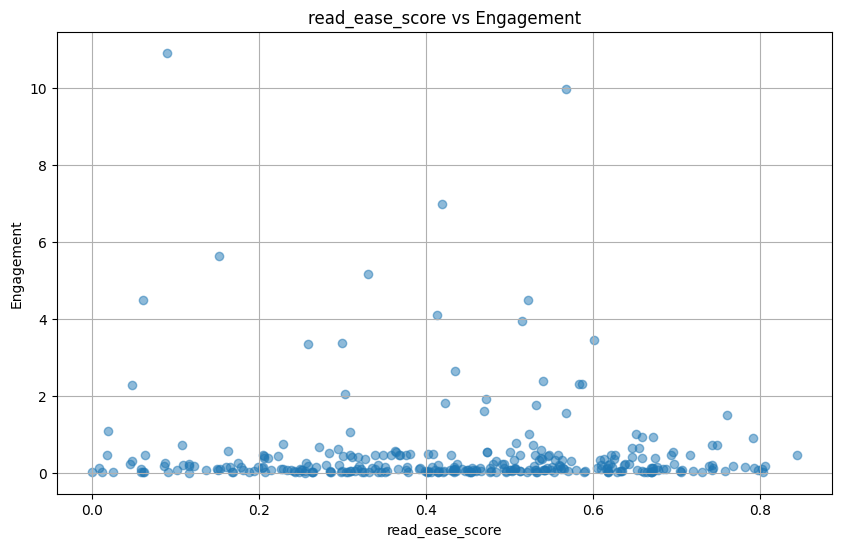

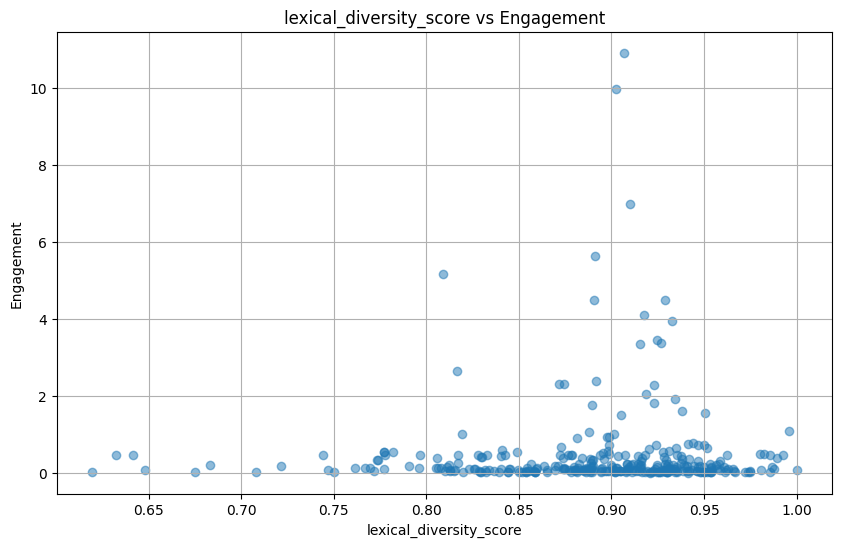

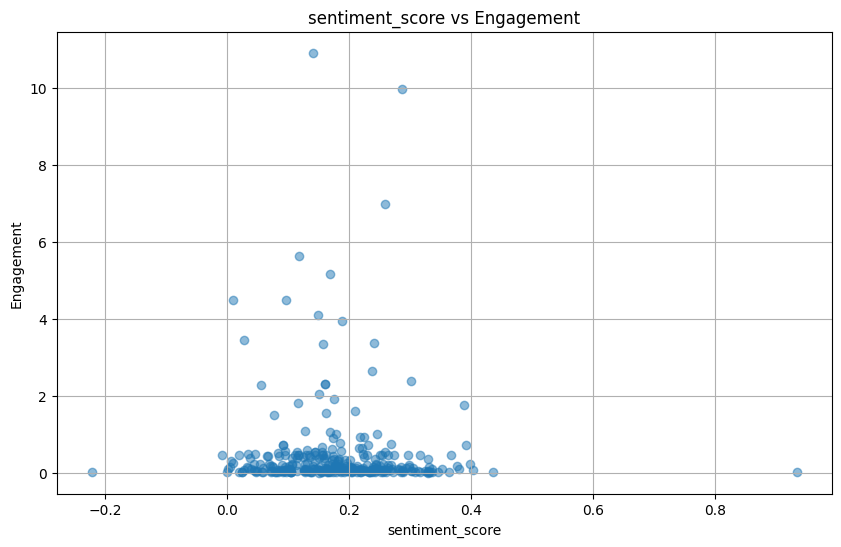

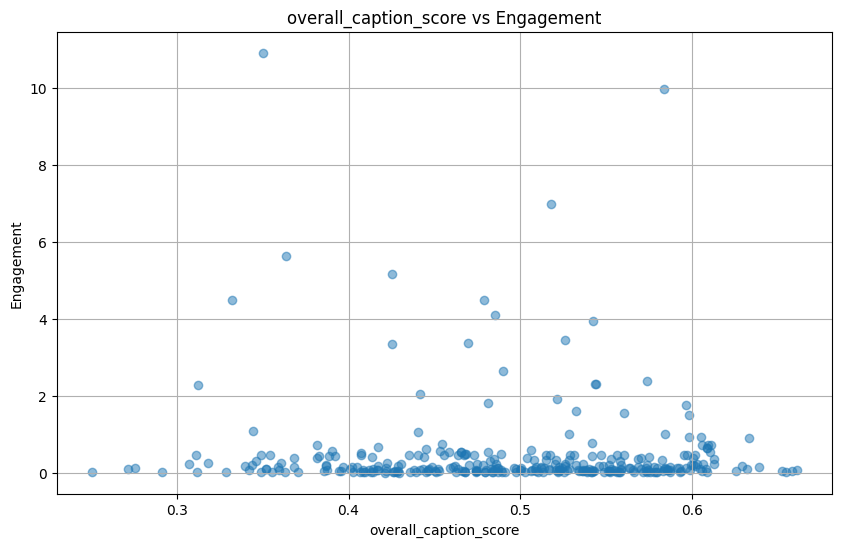

In [56]:
def plot_features_vs_engagement(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        plt.scatter(df[feature], df['engagement'], alpha=0.5)
        plt.title(f'{feature} vs Engagement')
        plt.xlabel(feature)
        plt.ylabel('Engagement')
        plt.grid(True)
        plt.show()

features = ['read_ease_score', 'lexical_diversity_score', 'sentiment_score', 'overall_caption_score']

plot_features_vs_engagement(caption_quality_df[caption_quality_df['category'] == 'automobile'], features)